In [43]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0

# For plots
import matplotlib.pyplot as plt

import pandas as pd

from astropy.io import fits

import numpy as np

import math

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from scipy import stats

In [4]:
# the catalogue name in VizieR
CATALOGUE = "J/MNRAS/478/4513"

In [5]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [6]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

GALAH Survey DR2
Short Name: J/MNRAS/478/4513
IVOA Identifier: ivo://cds.vizier/j/mnras/478/4513
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

The Galactic Archaeology with HERMES (GALAH) survey is a large-scale stellar
spectroscopic survey of the Milky Way, designed to deliver complementary
chemical information to a large number of stars covered by the Gaia mission.
We present the GALAH second public data release (GALAH DR2) containing 342 682
stars. For these stars, the GALAH collaboration provides stellar parameters
and abundances for up to 23 elements to the community. Here we present the
target selection, observation, data reduction, and detailed explanation of how
the spectra were analysed to estimate stellar parameters and element
abundances. For the stellar analysis, we have used a multistep approach. We
use the physics-driven spectrum synthesis of Spectroscopy Made Easy (SME) to
derive stellar labels (Teff, logg, [Fe/H], [X/Fe], vmic, vs

In [7]:
conesearch_radius = 1.0  # in degrees
conesearch_center = (67.0,-13.0)
conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius,)
conesearch_records

<DALResultsTable length=120>
   _r    recno      StarId         sobjectId    ...  e_[Eu/Fe]  f_[Eu/Fe] Simbad
                                                ...                             
float64  int32      str16            int64      ...   float32     uint8    str6 
-------- ----- ---------------- --------------- ... ----------- --------- ------
0.975164 23565 04260677-1208253 141231002501192 ...     0.06902         5 Simbad
0.718801 23658 04262724-1223168 141231002501174 ...     0.06336         5 Simbad
0.760335 23675 04263137-1219496 141231002501178 ...     0.08982         3 Simbad
0.636624 23708 04263943-1227144 141231002501169 ...     0.05326         0 Simbad
0.579301 23713 04264056-1231083 141231002501165 ...     0.05897         5 Simbad
0.541943 23729 04264397-1233170 141231002501163 ...     0.06424         5 Simbad
0.806149 23733 04264498-1215135 141231002501182 ...      0.1666         7 Simbad
0.867199 23763 04265115-1210452 141231002501187 ...     0.06293         2 Simbad

In [8]:
conesearch_radius = 1.7 # in degrees
conesearch_center = (4.5, -72.5)
conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius,)

Star_ID = conesearch_records['StarId'].data[0:len(conesearch_records)]

In [9]:
len(Star_ID)

878

In [1]:
hdul = fits.open('GALAH_DR3_main_allstar_v2.fits')

NameError: name 'fits' is not defined

In [11]:
hdul.info()

Filename: GALAH_DR3_main_allstar_v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    904   588571R x 197C   [16A, K, K, K, 12A, K, K, 6A, 4A, K, E, D, E, E, 3A, E, D, E, D, K, E, E, E, D, E, D, D, D, K, E, E, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, K, K, D, D, D, D, D, D, D, D, D, D, E, E, K, D, D, D, D, D, K, E, E, E, E, E, E, E, 3A, D, D, 4A, D, D, E, D]   


In [12]:
data = hdul[1].data

In [13]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1484 / length of dimension 1                          
NAXIS2  =               588571 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  197 / number of table fields                         
TCOMM1  = '2MASS identifier'                                                    
TUCD1   = 'meta.id.cross'                                                       
TCOMM2  = 'GALAH identifier'                                                    
TUCD2   = 'meta.id '                                                            
TCOMM3  = 'Gaia DR2 source_i

In [14]:
index = []
for j in range(len(Star_ID)):
    for i in range(len(data)):
        if data[i][0] == Star_ID[j]:
            index.append(i)
            break
print(index)

[65873, 65805, 65814, 65869, 65845, 65820, 65831, 65826, 65825, 65839, 65862, 65863, 65804, 65803, 65801, 65819, 65842, 65809, 65832, 65858, 65843, 65817, 65813, 65856, 65793, 65799, 65800, 65880, 65827, 65868, 65838, 65854, 65797, 65836, 65815, 65807, 65877, 65887, 65821, 65855, 65879, 65859, 65850, 65886, 65796, 65822, 65794, 65888, 65876, 65851, 65866, 65861, 65824, 65847, 65894, 65881, 65885, 65779, 65874, 65882, 65846, 65780, 65896, 65899, 65778, 65786, 65818, 65828, 65848, 65775, 65875, 65883, 65860, 65798, 65903, 65785, 65811, 65774, 65895, 65777, 65853, 65781, 65900, 65812, 65789, 65897, 65792, 65782, 65907, 65884, 65909, 65768, 65835, 65776, 65808, 65910, 65912, 65772, 65898, 65783, 65871, 65870, 65834, 65802, 65787, 65849, 65766, 65770, 65767, 65823, 65872, 65773, 65889, 65830, 65795, 65765, 65915, 65908, 65914, 65913, 65921, 65791, 65902, 65769, 65922, 65759, 65916, 65911, 65924, 65771, 65918, 65920, 65905, 65762, 65923, 65784, 65917, 65919, 65891, 65893, 65758, 65757, 65764

In [15]:
len(data)

588571

In [16]:
index_flagged = []

for i in index:
    if data['flag_sp'][i] == 0 and data['flag_fe_h'][i] == 0:
        index_flagged.append(i)
        
print(len(index_flagged))

654


In [17]:
# for key,value in data.items():
    
#     print(key)

In [18]:
count = 0
print(len(index_flagged))
for i in index_flagged:
    if data['v_jk'][i] < 12.0 or data['v_jk'][i] > 14.0:
        print (data['v_jk'][i])
print(count)

654
0


In [19]:
feh = []
logg = []
teff = []
ebv = []   
e_fe_h = []
# index_flagged = [65873, 65805, 65814, 65869, 65845, 65820, 65831, 65826, 65825, 65839, 65862, 65863, 65804, 65803, 65801, 65819, 65809, 65832, 65858, 65843, 65817, 65813, 65856, 65793, 65799, 65880, 65827, 65868, 65838, 65854, 65797, 65836, 65815, 65807, 65877, 65855, 65859, 65850, 65796, 65822, 65794, 65888, 65876, 65851, 65847, 65894, 65881, 65885, 65779, 65874, 65882, 65846, 65780, 65896, 65899, 65778, 65786, 65818, 65828, 65848, 65775, 65875, 65883, 65860, 65785, 65811, 65774, 65895, 65777, 65853, 65900, 65812, 65789, 65792, 65782, 65907, 65884, 65909, 65768, 65776, 65808, 65910, 65912, 65898, 65871, 65870, 65834, 65787, 65849, 65766, 65770, 65767, 65823, 65872, 65889, 65830, 65795, 65765, 65915, 65908, 65913, 65921, 65791, 65902, 65769, 65922, 65759, 65916, 65911, 65924, 65771, 65918, 65920, 65762, 65923, 65784, 65919, 65891, 65893, 65758, 65757, 65764, 65760, 65890, 65761, 65788, 65790, 65925, 65763, 65901, 65928, 65892, 65929, 65926, 65927, 65878, 65953, 65904, 65754, 65930, 65755, 65931, 65753, 65748, 65938, 65752, 65934, 65751, 65750, 65749, 65932, 65933, 65744, 65943, 65945, 65936, 65935, 65906, 65746, 65949, 65747, 65745, 65986, 66017, 65937, 78537, 65939, 65741, 65946, 65743, 65721, 65718, 65675, 65996, 78540, 65738, 66007, 66001, 65947, 65992, 65742, 65730, 65682, 65739, 65948, 65737, 65715, 65954, 65736, 65732, 65952, 65735, 65717, 65734, 65972, 65991, 65963, 66000, 65950, 65984, 65951, 65956, 65726, 65958, 65980, 65733, 65720, 78556, 65957, 65729, 65724, 65961, 65731, 65684, 65719, 65964, 65716, 65703, 78557, 65979, 65971, 65978, 65728, 65698, 65959, 65987, 65994, 65727, 65981, 65968, 65699, 65708, 65966, 65722, 65974, 66005, 65969, 65709, 65993, 65693, 65967, 65690, 65697, 65702, 65977, 65711, 66014, 65975, 65985, 65988, 65707, 58868, 58851, 78573, 65700, 66009, 58846, 65687, 58855, 58865, 58857, 65689, 65704, 58844, 65680, 58869, 58871, 65671, 58832, 58841, 73355, 58858, 58835, 65706, 66003, 58833, 73354, 58830, 73349, 58848, 66016, 73350, 58822, 65694, 58827, 58854, 58883, 58889, 58862, 58819, 58853, 181115, 58824, 58831, 66010, 58898, 73352, 58856, 58810, 58816, 58825, 58829, 65685, 58837, 58877, 58836, 58838, 58823, 73347, 58818, 65683, 73358, 58876, 58828, 65669, 73356, 58845, 58811, 325315, 58867, 325310, 65691, 58872, 58843, 65679, 325313, 58847, 325332, 58803, 58866, 58850, 181099, 58797, 65688, 65998, 73360, 58870, 58880, 58875, 58806, 325333, 58804, 65686, 58799, 58849, 65676, 181105, 325312, 325306, 58840, 325316, 325299, 58808, 58899, 58796, 58863, 58815, 58885, 58807, 325337, 58873, 58900, 58802, 58820, 58874, 58904, 325301, 325336, 325298, 58809, 58805, 58795, 58794, 66015, 58886, 58897, 73357, 325343, 325320, 58903, 58788, 325304, 58792, 58906, 325295, 181096, 58901, 58789, 58902, 325290, 58785, 325322, 58774, 325361, 58911, 58896, 58907, 58787, 325345, 58791, 58793, 58775, 58780, 325300, 325302, 325356, 58908, 325331, 325328, 58761, 73341, 325335, 325303, 181085, 58779, 325323, 325309, 58786, 58801, 58772, 181082, 58910, 58759, 58913, 58773, 181090, 58912, 58920, 58915, 58800, 58917, 325286, 58798, 325363, 58737, 325353, 58936, 181086, 58931, 58731, 58782, 58777, 58750, 325314, 58950, 58918, 58938, 73378, 58725, 58724, 325371, 58756, 58734, 58939, 58765, 325358, 73333, 58923, 58919, 58932, 58778, 58953, 325367, 58956, 58764, 325280, 58740, 58954, 181076, 58769, 58925, 325370, 58712, 58946, 58767, 325318, 325352, 325355, 58944, 58770, 325294, 325293, 58924, 58710, 325378, 58952, 58926, 325372, 58754, 325368, 325282, 325289, 325346, 325349, 58934, 325354, 325308, 325288, 325369, 325374, 58771, 58928, 58957, 58755, 58768, 325327, 58930, 58733, 58738, 325305, 58732, 58960, 58763, 325296, 325351, 325384, 58739, 58760, 58766, 325287, 58749, 58751, 58748, 58744, 325386, 58942, 58935, 58718, 325362, 58747, 58937, 325341, 325359, 58948, 58762, 325387, 325340, 325382, 58758, 325381, 325339, 58735, 58951, 325373, 58711, 325279, 58757, 325383, 325366, 58745, 325342, 58752, 58726, 325392, 325347, 58753, 58940, 325377, 58743, 325395, 325285, 325326, 325393, 325321, 58943, 325307, 58945, 325348, 325319, 325330, 58708, 58722, 325390, 325275, 325329, 325375, 58736, 58719, 58947, 325396, 325385, 325401, 325394, 325397, 58961, 58728, 325398, 58715, 58720, 325344, 58729, 58709, 58707, 58721, 325403, 58716, 325277, 325399, 325376, 325404, 325402, 325389, 325407, 325405, 325429, 325388, 325409, 325413, 325410, 325408, 325283, 325411, 325284, 325412, 325415, 325414, 325425, 325420, 325416, 325417, 325428, 325461, 325418, 325423, 325421, 325426, 325437, 325424, 325431, 325434, 325440, 325436, 325430, 325435, 156852, 156838, 156835, 156841, 164140, 156823, 156822, 65841, 65829, 65837, 65864, 65865, 65844, 164159, 65833, 65810, 65852, 65816, 65867, 65806]
sobject_id = []
for i in index_flagged:
    feh.append(data['fe_h'][i])
    logg.append(data['logg'][i])
    teff.append(data['teff'][i])
    ebv.append(data['ebv'][i])
    sobject_id.append(data['sobject_id'][i])
    e_fe_h.append(data['e_fe_h'][i])

In [20]:
print(e_fe_h)

[0.13210883991552247, 0.057260641415745835, 0.053212701803914804, 0.13652135071348834, 0.09647726121648231, 0.07393360754679008, 0.07201168836024723, 0.07753434812392318, 0.06699920777090207, 0.055336486415098404, 0.06068203242978576, 0.06803691890937363, 0.05931958494546712, 0.07426444637332674, 0.06968906946612227, 0.08635752681971862, 0.04945061343597959, 0.06363793121294256, 0.0820446228343953, 0.05658576079673752, 0.07690692625543888, 0.10869464199115977, 0.11972851502730303, 0.07721556992124329, 0.060408521975212945, 0.0841968067567269, 0.09333331360894141, 0.13011650285597084, 0.10103475800005869, 0.09193074791455635, 0.09629967535096547, 0.10973974070521011, 0.08921777918504459, 0.05719806416519879, 0.08554183220062068, 0.1326213361702233, 0.1254003743023543, 0.04908233530774325, 0.07467481682442084, 0.08026392516014595, 0.08357894273556019, 0.09204423469493321, 0.05496698323879262, 0.05601991437909987, 0.0663529360519237, 0.10066151939334674, 0.08550407683749132, 0.08304961154

In [21]:
print(feh)

[-0.21696854, 0.14709854, -0.020159721, -0.24042082, -0.034704685, -0.060964584, -0.54173183, -0.3623042, -0.4649825, -0.19224358, -0.00017881393, -0.07248497, 0.21705341, 0.3847108, 0.40563726, -0.3832984, -0.3114996, 0.053738117, -0.24588871, -0.14294338, -0.28680038, -0.069894314, -0.30560875, -0.17697811, -1.1154976, -0.24737787, -0.2469182, -0.47349262, -0.4554863, 0.1858077, -0.1588788, -0.3896842, -0.18318558, 0.09678793, -0.07336855, -0.099627495, -0.15231991, 0.063988686, 0.071656704, -0.29832172, -0.007375717, -0.007960796, 0.12022257, 0.025295734, -0.23625469, 0.08952904, -0.47768402, 0.28593826, -0.42210484, -0.08421373, -0.036169052, -0.15657997, -0.2889986, -0.43016958, -0.44341898, -0.30206966, 0.32844877, -0.16523886, -0.044794083, -0.42976475, 0.21120405, 0.36678314, -0.5652981, -0.04475355, -0.12173414, -0.64126205, -0.108652115, -0.355299, -1.0030794, -0.12871027, -0.004146099, -0.07890749, -0.18058443, -0.10136795, -0.54929495, -0.61052275, 0.11069393, -0.010681152,

In [22]:
print(index_flagged)

[65873, 65805, 65814, 65869, 65845, 65820, 65831, 65826, 65825, 65839, 65862, 65863, 65804, 65803, 65801, 65819, 65809, 65832, 65858, 65843, 65817, 65813, 65856, 65793, 65799, 65880, 65827, 65868, 65838, 65854, 65797, 65836, 65815, 65807, 65877, 65855, 65859, 65850, 65796, 65822, 65794, 65888, 65876, 65851, 65847, 65894, 65881, 65885, 65779, 65874, 65882, 65846, 65780, 65896, 65899, 65778, 65786, 65818, 65828, 65848, 65775, 65875, 65883, 65860, 65785, 65811, 65774, 65895, 65777, 65853, 65900, 65812, 65789, 65792, 65782, 65907, 65884, 65909, 65768, 65776, 65808, 65910, 65912, 65898, 65871, 65870, 65834, 65787, 65849, 65766, 65770, 65767, 65823, 65872, 65889, 65830, 65795, 65765, 65915, 65908, 65913, 65921, 65791, 65902, 65769, 65922, 65759, 65916, 65911, 65924, 65771, 65918, 65920, 65762, 65923, 65784, 65919, 65891, 65893, 65758, 65757, 65764, 65760, 65890, 65761, 65788, 65790, 65925, 65763, 65901, 65928, 65892, 65929, 65926, 65927, 65878, 65953, 65904, 65754, 65930, 65755, 65931, 65753

In [23]:
print(data['sobject_id'][303309])

160923005201156


In [24]:
print((ebv))

[0.0, 0.0361627, 0.0, 0.0, 0.0, 0.0352648, 0.0, 0.0364814, 0.0364814, 0.0, 0.0, 0.0, 0.0362174, 0.0362174, 0.0360775, 0.0, 0.0340811, 0.007655905824281412, 0.005102931239318299, 0.0, 0.0, 0.01020804317687792, 0.0, 0.0, 0.034944, 0.0359591, 0.0, 0.0309207, 0.0307703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0305571, 0.0, 0.0336402, 0.0, 0.0, 0.0324613, 0.0338614, 0.0303803, 0.0, 0.0, 0.0, 0.0, 0.0295755, 0.0326659, 0.0, 0.0305443, 0.0, 0.0312019, 0.0025530135260006456, 0.0, 0.0, 0.0314995, 0.0, 0.0317235, 0.0325332, 0.0, 0.0304696, 0.0326048, 0.0, 0.0330708, 0.0, 0.0, 0.0303623, 0.0, 0.042303, 0.0, 0.007655321708680283, 0.0, 0.0253433, 0.0, 0.0297873, 0.0, 0.0293774, 0.0, 0.0290039, 0.0372528, 0.0314563, 0.0, 0.0, 0.0310937, 0.0, 0.0, 0.0335812, 0.0380293, 0.0, 0.0, 0.0, 0.0245144, 0.0, 0.0, 0.0330676, 0.0, 0.03947, 0.0292883, 0.0301308, 0.0, 0.0335915, 0.0292883, 0.0, 0.007657112996521028, 0.0266034, 0.0299557, 0.0, 0.0, 0.0, 0.0, 0.03597, 0.0330347,

In [25]:
hdul = fits.open('GALAH_DR3_VAC_ages_v2.fits')

In [26]:
data_gaiadr3 = pd.DataFrame(hdul[1].data)

In [27]:
index_gaiadr3 = []
for j in range(len(sobject_id)):
    for i in range(len(data_gaiadr3)):
        if data_gaiadr3['sobject_id'][i] == sobject_id[j]:
            index_gaiadr3.append(i)
        if len(index_gaiadr3) == len(sobject_id):
            break
    else:
        continue
    break    

In [28]:
print(index_gaiadr3)

[91290, 91222, 91231, 91286, 91262, 91237, 91248, 91243, 91242, 91256, 91279, 91280, 91221, 91220, 91218, 91236, 91226, 91249, 91275, 91260, 91234, 91230, 91273, 91210, 91216, 91297, 91244, 91285, 91255, 91271, 91214, 91253, 91232, 91224, 91294, 91272, 91276, 91267, 91213, 91239, 91211, 91305, 91293, 91268, 91264, 91311, 91298, 91302, 91196, 91291, 91299, 91263, 91197, 91313, 91316, 91195, 91203, 91235, 91245, 91265, 91192, 91292, 91300, 91277, 91202, 91228, 91191, 91312, 91194, 91270, 91317, 91229, 91206, 91209, 91199, 91324, 91301, 91326, 91185, 91193, 91225, 91327, 91329, 91315, 91288, 91287, 91251, 91204, 91266, 91183, 91187, 91184, 91240, 91289, 91306, 91247, 91212, 91182, 91332, 91325, 91330, 91338, 91208, 91319, 91186, 91339, 91176, 91333, 91328, 91341, 91188, 91335, 91337, 91179, 91340, 91201, 91336, 91308, 91310, 91175, 91174, 91181, 91177, 91307, 91178, 91205, 91207, 91342, 91180, 91318, 91345, 91309, 91346, 91343, 91344, 91295, 91370, 91321, 91171, 91347, 91172, 91348, 91170

In [29]:
# print(data_gaiadr3['sobject_id'][358044])

In [30]:
# index_gaiadr3 = [83398, 83399, 83400, 83401, 83402, 83404, 83407, 83408, 83410, 83413, 83414, 83415, 83416, 83418, 83420, 83421, 83423, 83424, 83426, 83427, 83428, 83429, 83430, 83431, 83432, 83433, 83434, 83435, 83438, 83439, 83440, 83442, 83444, 83445, 83446, 83447, 83448, 83449, 83450, 83451, 83452, 83453, 83454, 83457, 83458, 83460, 83461, 83462, 83463, 83464, 83466, 83469, 83470, 83471, 83472, 83473, 83474, 83475, 83476, 83477, 83479, 83480, 83481, 83482, 83484, 83487, 83488, 83489, 83490, 83492, 83496, 83497, 83500, 83501, 83502, 83503, 83504, 83509, 83510, 83511, 83512, 83514, 83515, 83516, 83517, 83518, 83519, 83520, 83521, 83522, 83523, 83527, 83528, 83530, 83531, 83532, 83534, 83535, 83536, 83537, 83539, 83540, 83541, 83542, 83543, 83544, 83545, 83547, 83549, 83550, 83551, 83553, 83554, 83557, 83558, 83561, 83562, 83563, 83567, 83568, 83569, 83570, 83572, 83573, 83575, 83576, 83579, 83581, 83585, 83586, 83588, 83589, 83591, 83593, 83596, 83597, 83598, 83599, 83600, 83601, 83603, 83604, 83605, 83610, 83616, 83618, 83619, 83625, 83635, 83637, 83639, 83641, 83642, 83643, 83644, 83645, 83647, 83650, 83651, 83652, 83654, 83655, 83657, 83658, 83660, 83662, 83663, 83664, 83665, 83668, 83669, 83670, 83671, 83673, 83675, 83676, 83677, 83679, 83680, 83681, 83682, 83683, 83684, 83685, 83688, 83689, 83690, 83691, 83692, 83693, 83694, 83696, 83697, 83698, 83699, 83700, 83702, 83703, 83708, 83709, 91086, 91088, 91092, 91093, 91096, 91097, 91099, 91100, 91101, 91102, 91103, 91104, 91105, 91106, 91107, 91108, 91110, 91111, 91114, 91115, 91116, 91117, 91119, 91120, 91121, 91123, 91124, 91125, 91126, 91128, 91132, 91133, 91134, 91135, 91136, 91137, 91138, 91139, 91141, 91143, 91144, 91145, 91146, 91147, 91148, 91149, 91150, 91151, 91152, 91153, 91154, 91155, 91156, 91158, 91159, 91160, 91161, 91162, 91163, 91164, 91165, 91166, 91167, 91168, 91169, 91170, 91171, 91172, 91174, 91175, 91176, 91177, 91178, 91179, 91180, 91181, 91182, 91183, 91184, 91185, 91186, 91187, 91188, 91191, 91192, 91193, 91194, 91195, 91196, 91197, 91199, 91201, 91202, 91203, 91204, 91205, 91206, 91207, 91208, 91209, 91210, 91211, 91212, 91213, 91214, 91216, 91218, 91220, 91221, 91222, 91223, 91224, 91225, 91226, 91227, 91228, 91229, 91230, 91231, 91232, 91233, 91234, 91235, 91236, 91237, 91239, 91240, 91242, 91243, 91244, 91245, 91246, 91247, 91248, 91249, 91250, 91251, 91253, 91254, 91255, 91256, 91258, 91260, 91261, 91262, 91263, 91264, 91265, 91266, 91267, 91268, 91269, 91270, 91271, 91272, 91273, 91275, 91276, 91277, 91279, 91280, 91281, 91282, 91284, 91285, 91286, 91287, 91288, 91289, 91290, 91291, 91292, 91293, 91294, 91295, 91297, 91298, 91299, 91300, 91301, 91302, 91305, 91306, 91307, 91308, 91309, 91310, 91311, 91312, 91313, 91315, 91316, 91317, 91318, 91319, 91321, 91323, 91324, 91325, 91326, 91327, 91328, 91329, 91330, 91332, 91333, 91335, 91336, 91337, 91338, 91339, 91340, 91341, 91342, 91343, 91344, 91345, 91346, 91347, 91348, 91349, 91350, 91351, 91352, 91353, 91354, 91355, 91356, 91360, 91362, 91363, 91364, 91365, 91366, 91367, 91368, 91369, 91370, 91371, 91373, 91374, 91375, 91376, 91378, 91380, 91381, 91383, 91384, 91385, 91386, 91388, 91389, 91391, 91392, 91394, 91395, 91396, 91397, 91398, 91401, 91402, 91403, 91404, 91405, 91408, 91409, 91410, 91411, 91413, 91415, 91417, 91418, 91420, 91422, 91424, 91426, 91427, 91431, 91432, 91433, 91434, 103469, 103480, 103490, 103493, 103494, 103496, 103498, 103499, 103500, 103501, 103502, 103505, 103524, 108829, 108832, 108848, 108849, 108865, 200391, 200392, 200404, 200407, 200410, 200421, 208116, 208135, 227115, 227121, 227124, 227125, 227129, 227135, 227138, 227144, 227154, 380915, 380917, 380919, 380920, 380922, 380923, 380924, 380925, 380926, 380927, 380928, 380929, 380930, 380933, 380934, 380935, 380936, 380938, 380939, 380940, 380941, 380942, 380943, 380944, 380945, 380946, 380947, 380948, 380949, 380950, 380952, 380953, 380954, 380955, 380956, 380958, 380959, 380960, 380961, 380962, 380963, 380966, 380967, 380968, 380969, 380970, 380971, 380972, 380973, 380975, 380976, 380977, 380979, 380980, 380981, 380982, 380983, 380984, 380985, 380986, 380987, 380988, 380989, 380991, 380992, 380993, 380994, 380995, 380996, 380998, 380999, 381001, 381002, 381003, 381006, 381007, 381008, 381009, 381010, 381011, 381012, 381013, 381014, 381015, 381016, 381017, 381018, 381021, 381022, 381023, 381024, 381025, 381026, 381027, 381028, 381029, 381030, 381032, 381033, 381034, 381035, 381036, 381037, 381038, 381039, 381041, 381042, 381043, 381044, 381045, 381047, 381048, 381049, 381050, 381051, 381052, 381053, 381054, 381055, 381056, 381057, 381058, 381060, 381061, 381063, 381064, 381065, 381066, 381068, 381069, 381070, 381071, 381074, 381075, 381076, 381077, 381080, 381101]

age = []
distance = []
ebv_bstep = []
e_age_bstep = []
e50_age_bstep = []
for i in index_gaiadr3:
    age.append(data_gaiadr3['age_bstep'][i])
    distance.append(1/((data_gaiadr3['distance_bstep'][i])*pow(10,-3)))
    ebv_bstep.append(data_gaiadr3['ebv_bstep'][i])
    e_age_bstep.append(data_gaiadr3['e_age_bstep'][i])
    e50_age_bstep.append(data_gaiadr3['e50_age_bstep'][i])

In [31]:
age_distance = []
for i in range(len(age)):
    age_distance.append((age[i],distance[i]))
print(age_distance)

[(8.438451524107936, 1276.3434304926004), (7.1096432531739815, 973.7308564907663), (4.439250984912284, 4156.183978423747), (4.297758366922538, 1131.1567289099405), (7.0093329525643115, 1553.204235648941), (5.932181967321045, 3982.1703526576034), (11.759933696286478, 3057.0841586051647), (6.436813891225943, 1548.9920793429765), (10.264748018084605, 525.9883991912175), (7.723265393031836, 2158.1788626708326), (10.24474381444289, 2798.7075491099977), (8.747364976750553, 1838.3091159176179), (10.461705791748711, 2855.5005127425406), (7.2327389300066045, 2289.0243841223414), (6.210965098978325, 1580.2482941834846), (11.20472668806197, 1923.2277634590755), (9.546633686201, 925.9464254570039), (9.977311672605941, 3901.544492794678), (10.243514720243407, 1860.5719754445533), (6.473440581901527, 1270.4021393631162), (7.729955811394165, 2841.707614983786), (5.2362443448403315, 3101.1960547679355), (11.72573934315799, 1203.1944500231195), (5.917056606385433, 1203.6804383956485), (9.71570495383322

In [32]:
print(age)

[8.438451524107936, 7.1096432531739815, 4.439250984912284, 4.297758366922538, 7.0093329525643115, 5.932181967321045, 11.759933696286478, 6.436813891225943, 10.264748018084605, 7.723265393031836, 10.24474381444289, 8.747364976750553, 10.461705791748711, 7.2327389300066045, 6.210965098978325, 11.20472668806197, 9.546633686201, 9.977311672605941, 10.243514720243407, 6.473440581901527, 7.729955811394165, 5.2362443448403315, 11.72573934315799, 5.917056606385433, 9.715704953833226, 4.32306833962372, 8.11634764642228, 7.348046789349004, 11.65104036882736, 8.893557995564302, 7.885208455765426, 6.989407096216288, 3.5180351927315874, 4.655538453323706, 8.60749688091074, 8.847864615237762, 7.790293683979132, 10.003547425445532, 7.633425005218512, 5.220366016467997, 4.257411218545712, 3.115151001825399, 7.349888171660926, 6.867713962032675, 6.203497894072146, 5.391609816643039, 11.697340476446929, 5.736814564006128, 8.8185025825807, 7.947288889023596, 6.086276633011677, 6.7907506164582845, 9.93017

In [33]:
distance_moded = []
age_modded = []

for i in range(len(distance)):
    if distance[i] > 1000:
        distance_moded.append(distance[i])
        age_modded.append(age[i])
        

In [34]:
print(data_gaiadr3['ebv_bstep'][347687])

0.0017886754245466745


In [35]:
print(data_gaiadr3.keys())

Index(['sobject_id', 'age_bstep', 'e_age_bstep', 'e16_age_bstep',
       'e50_age_bstep', 'e84_age_bstep', 'm_act_bstep', 'e_m_act_bstep',
       'e16_m_act_bstep', 'e50_m_act_bstep', 'e84_m_act_bstep', 'm_ini_bstep',
       'e_m_ini_bstep', 'e16_m_ini_bstep', 'e50_m_ini_bstep',
       'e84_m_ini_bstep', 'radius_bstep', 'e_radius_bstep', 'e16_radius_bstep',
       'e50_radius_bstep', 'e84_radius_bstep', 'is_redclump_bstep',
       'e_is_redclump_bstep', 'e16_is_redclump_bstep', 'e50_is_redclump_bstep',
       'e84_is_redclump_bstep', 'distance_bstep', 'e_distance_bstep',
       'e16_distance_bstep', 'e50_distance_bstep', 'e84_distance_bstep',
       'ebv_bstep', 'e_ebv_bstep', 'e16_ebv_bstep', 'e50_ebv_bstep',
       'e84_ebv_bstep', 'teff_bstep', 'e_teff_bstep', 'e16_teff_bstep',
       'e50_teff_bstep', 'e84_teff_bstep', 'logg_bstep', 'e_logg_bstep',
       'e16_logg_bstep', 'e50_logg_bstep', 'e84_logg_bstep', 'meh_act_bstep',
       'e_meh_act_bstep', 'e16_meh_act_bstep', 'e50_meh_a

In [36]:
feh_distance = [] 
for i in range(len(feh)):
    
    feh_distance.append((feh[i],distance[i]))
print(feh_distance)

[(-0.21696854, 1276.3434304926004), (0.14709854, 973.7308564907663), (-0.020159721, 4156.183978423747), (-0.24042082, 1131.1567289099405), (-0.034704685, 1553.204235648941), (-0.060964584, 3982.1703526576034), (-0.54173183, 3057.0841586051647), (-0.3623042, 1548.9920793429765), (-0.4649825, 525.9883991912175), (-0.19224358, 2158.1788626708326), (-0.00017881393, 2798.7075491099977), (-0.07248497, 1838.3091159176179), (0.21705341, 2855.5005127425406), (0.3847108, 2289.0243841223414), (0.40563726, 1580.2482941834846), (-0.3832984, 1923.2277634590755), (-0.3114996, 925.9464254570039), (0.053738117, 3901.544492794678), (-0.24588871, 1860.5719754445533), (-0.14294338, 1270.4021393631162), (-0.28680038, 2841.707614983786), (-0.069894314, 3101.1960547679355), (-0.30560875, 1203.1944500231195), (-0.17697811, 1203.6804383956485), (-1.1154976, 458.6592561394482), (-0.24737787, 3599.250342574314), (-0.2469182, 1613.7928983373833), (-0.47349262, 234.5290238829143), (-0.4554863, 1181.1106303252304),

In [37]:
print(np.max(distance))

7916.735642402389


In [38]:
print(age)

[8.438451524107936, 7.1096432531739815, 4.439250984912284, 4.297758366922538, 7.0093329525643115, 5.932181967321045, 11.759933696286478, 6.436813891225943, 10.264748018084605, 7.723265393031836, 10.24474381444289, 8.747364976750553, 10.461705791748711, 7.2327389300066045, 6.210965098978325, 11.20472668806197, 9.546633686201, 9.977311672605941, 10.243514720243407, 6.473440581901527, 7.729955811394165, 5.2362443448403315, 11.72573934315799, 5.917056606385433, 9.715704953833226, 4.32306833962372, 8.11634764642228, 7.348046789349004, 11.65104036882736, 8.893557995564302, 7.885208455765426, 6.989407096216288, 3.5180351927315874, 4.655538453323706, 8.60749688091074, 8.847864615237762, 7.790293683979132, 10.003547425445532, 7.633425005218512, 5.220366016467997, 4.257411218545712, 3.115151001825399, 7.349888171660926, 6.867713962032675, 6.203497894072146, 5.391609816643039, 11.697340476446929, 5.736814564006128, 8.8185025825807, 7.947288889023596, 6.086276633011677, 6.7907506164582845, 9.93017

In [39]:
print(e_age_bstep)

[2.46959305034413, 2.8174208387991673, 2.82973320414439, 1.5000853350167018, 2.166903735166349, 3.6810821181324087, 1.3556409525275308, 0.8744754310868212, 2.5017391838249208, 1.256586956741557, 1.6565042233066674, 1.2071121248540897, 1.939809109190433, 2.6068495383868098, 1.5074469270715345, 1.816320762674839, 2.9911598189328488, 2.5017391838249208, 1.6565042233066674, 2.569518344012055, 3.750232254716912, 3.803273572561436, 1.3556409525275308, 1.0660043929814913, 2.8354722043761496, 3.133759505867708, 2.8583536794670583, 5.21887557685651, 1.0589843187163384, 2.178923740677932, 3.83982112588159, 4.040375229152614, 0.7405634096375329, 1.3571423229588306, 1.7764878856598112, 2.998524242715281, 4.195931899236564, 1.3859501577039985, 3.750232254716912, 0.4840492250725932, 0.29490509530689124, 1.2298488022192107, 1.4776182630946146, 1.4111144862252303, 2.744663922929038, 3.3571867922959564, 1.3556409525275308, 1.8023520223784257, 3.263617803798941, 3.4553271594100208, 4.190994674827472, 2.

In [40]:
print(e50_age_bstep)

[8.317637711026709, 6.606934480075965, 4.168693834703347, 4.168693834703347, 6.918309709189363, 5.754399373371567, 12.02264434617413, 6.309573444801943, 10.964781961431829, 7.585775750291821, 10.471285480508985, 8.709635899560796, 10.471285480508985, 7.244359600749891, 6.309573444801943, 11.481536214968793, 10.0, 10.471285480508985, 10.471285480508985, 6.025595860743569, 7.943282347242821, 4.7863009232263805, 12.02264434617413, 6.025595860743569, 10.0, 3.801893963205613, 8.317637711026709, 8.317637711026709, 12.02264434617413, 8.709635899560796, 8.317637711026709, 6.918309709189363, 3.4673685045253095, 4.570881896148752, 8.709635899560796, 9.120108393559079, 8.317637711026709, 10.0, 7.943282347242821, 5.248074602497712, 4.168693834703347, 3.019951720402019, 7.244359600749891, 6.918309709189363, 5.4954087385762485, 5.011872336272715, 12.02264434617413, 5.4954087385762485, 9.120108393559079, 7.943282347242821, 5.754399373371567, 6.309573444801943, 10.0, 6.918309709189363, 2.2908676527677

In [41]:
feh_distance_age_err = []
for i in range(len(age)):
    feh_distance_age_err.append((feh[i],distance[i],age[i],e_age_bstep[i]))

print(feh_distance_age_err)

[(-0.21696854, 1276.3434304926004, 8.438451524107936, 2.46959305034413), (0.14709854, 973.7308564907663, 7.1096432531739815, 2.8174208387991673), (-0.020159721, 4156.183978423747, 4.439250984912284, 2.82973320414439), (-0.24042082, 1131.1567289099405, 4.297758366922538, 1.5000853350167018), (-0.034704685, 1553.204235648941, 7.0093329525643115, 2.166903735166349), (-0.060964584, 3982.1703526576034, 5.932181967321045, 3.6810821181324087), (-0.54173183, 3057.0841586051647, 11.759933696286478, 1.3556409525275308), (-0.3623042, 1548.9920793429765, 6.436813891225943, 0.8744754310868212), (-0.4649825, 525.9883991912175, 10.264748018084605, 2.5017391838249208), (-0.19224358, 2158.1788626708326, 7.723265393031836, 1.256586956741557), (-0.00017881393, 2798.7075491099977, 10.24474381444289, 1.6565042233066674), (-0.07248497, 1838.3091159176179, 8.747364976750553, 1.2071121248540897), (0.21705341, 2855.5005127425406, 10.461705791748711, 1.939809109190433), (0.3847108, 2289.0243841223414, 7.2327389

In [42]:
age_distance_feh_err = []
for i in range(len(age)):
    age_distance_feh_err.append((age[i],distance[i],feh[i],e_fe_h[i]))

print(age_distance_feh_err)

[(8.438451524107936, 1276.3434304926004, -0.21696854, 0.13210883991552247), (7.1096432531739815, 973.7308564907663, 0.14709854, 0.057260641415745835), (4.439250984912284, 4156.183978423747, -0.020159721, 0.053212701803914804), (4.297758366922538, 1131.1567289099405, -0.24042082, 0.13652135071348834), (7.0093329525643115, 1553.204235648941, -0.034704685, 0.09647726121648231), (5.932181967321045, 3982.1703526576034, -0.060964584, 0.07393360754679008), (11.759933696286478, 3057.0841586051647, -0.54173183, 0.07201168836024723), (6.436813891225943, 1548.9920793429765, -0.3623042, 0.07753434812392318), (10.264748018084605, 525.9883991912175, -0.4649825, 0.06699920777090207), (7.723265393031836, 2158.1788626708326, -0.19224358, 0.055336486415098404), (10.24474381444289, 2798.7075491099977, -0.00017881393, 0.06068203242978576), (8.747364976750553, 1838.3091159176179, -0.07248497, 0.06803691890937363), (10.461705791748711, 2855.5005127425406, 0.21705341, 0.05931958494546712), (7.232738930006604

(array([ 4.,  2.,  5.,  3.,  0.,  6.,  3., 21., 15., 24., 21., 22., 35.,
        30., 32., 45., 26., 39., 47., 49., 40., 33., 25., 31., 23., 19.,
        17., 19., 13.,  5.]),
 array([ 0.10303076,  0.51923821,  0.93544565,  1.3516531 ,  1.76786054,
         2.18406799,  2.60027543,  3.01648288,  3.43269032,  3.84889777,
         4.26510521,  4.68131266,  5.09752011,  5.51372755,  5.929935  ,
         6.34614244,  6.76234989,  7.17855733,  7.59476478,  8.01097222,
         8.42717967,  8.84338711,  9.25959456,  9.675802  , 10.09200945,
        10.50821689, 10.92442434, 11.34063178, 11.75683923, 12.17304667,
        12.58925412]),
 <BarContainer object of 30 artists>)

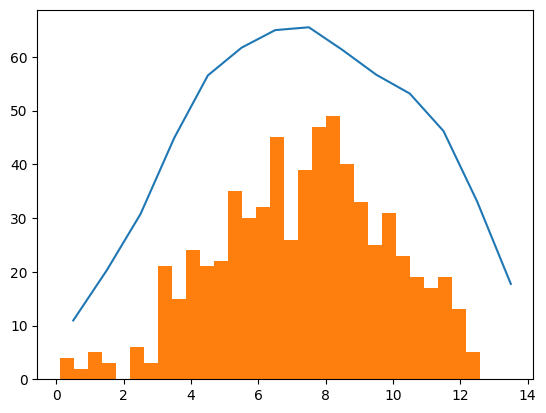

In [44]:
diced_age = []
e_age_bstep = np.maximum(e_age_bstep, 1e-6)

for i in range(len(age)):
    age_data = np.array(age[i])
    e_age_bstep_data = np.array(e_age_bstep[i])
    mu = age_data
    sigma = e_age_bstep_data
    x = np.arange(0.5,14,)
    age_norm = stats.norm.pdf(x,mu,sigma)
    diced_age.append(age_norm)
    # plt.plot(x[i], stats.norm.pdf(x[i], mu[i], sigma[i]))
# print(x,stats.norm.pdf(x, mu, sigma))
diced_age = np.array(diced_age)

# Sum the distributions across all age sets
added_age = np.sum(diced_age, axis=0)

plt.plot(x,added_age)
plt.hist(age,bins=30)

In [45]:
print(len(diced_age))

654


             0
0     8.438452
1     7.109643
2     4.439251
3     4.297758
4     7.009333
..         ...
649   7.540630
650   7.498478
651   6.862638
652  11.534525
653   6.096358

[654 rows x 1 columns]


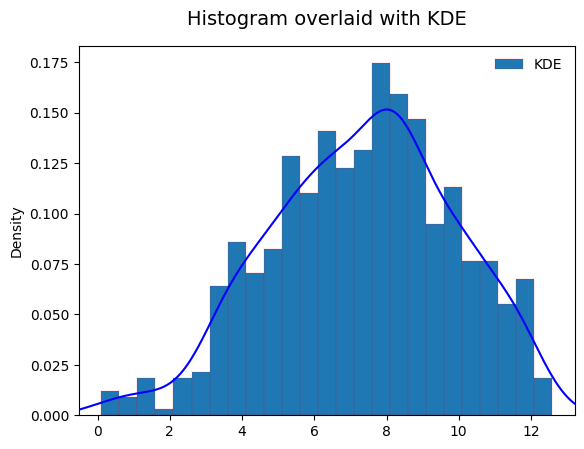

In [46]:
age = pd.DataFrame(age)
print(age)
# random number generator

# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
ax = age.plot.hist(bins=25, density=True, edgecolor='red', linewidth=0.125)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
age.plot.density(color='blue', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

            0
0   -0.216969
1    0.147099
2   -0.020160
3   -0.240421
4   -0.034705
..        ...
649 -0.528666
650 -1.765656
651 -0.145635
652 -0.325971
653 -0.180375

[654 rows x 1 columns]


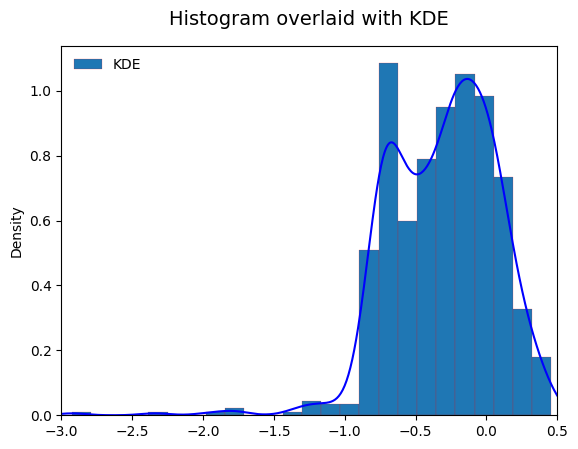

In [47]:
feh = pd.DataFrame(feh)
print(feh)
# random number generator

# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
ax = feh.plot.hist(bins=25, density=True, edgecolor='red', linewidth=0.125)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
feh.plot.density(color='blue', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim([-3,0.5])
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

In [ ]:
print(ebv_bstep)

In [ ]:
test_age = [2.8318841878972023, 8.667095266694915, 9.332412864825985, 8.719747920876399, 
            4.218032439266742, 8.678122544935382, 11.090611660235869, 8.863497168704278, 
            4.048199615486712, 6.6140891501592645, 6.81563737488496, 10.904039112309377,
            5.96701179279989, 3.555602745656286, 10.866980564516373, 12.520090744473357, 
            8.290856551810057, 7.050739921782873, 9.811189899968403, 8.534636971102469, 
            6.533972478806258, 10.657064955139454, 9.106041456185782, 9.08809159066338, 
            9.66919456995537, 9.031554726454633, 12.409628578719492, 9.814462397827299, 
            6.745696654486613, 6.131096837626928, 9.725396291126911, 10.467542639404744, 
            9.725653715785443, 11.948914555105926, 11.181390120814413, 7.252578459312718, 
            11.54104302710682, 10.993778200171578, 5.591767982510077227, 9.622001518423137365, 
            11.27269735186123, 9.425273811301198, 7.361816114004483, 8.519495616693192, 
            6.19658473157662, 9.177433828068436, 10.095183507677051, 7.828995103620823, 
            6.1702895149016594, 8.824374352364988, 4.705573941421993, 7.63247120505399, 
            7.527892673826485, 5.0158525057082715, 7.3135213680949995, 8.482752176182846, 
            6.9875923684253705, 3.5223732729093067, 5.653116268129869, 4.684576598225695, 
            6.58573946167494, 9.446743586141062, 5.367209606766316, 6.818534752597363, 
            4.629203252985071, 1.6562504511349248, 5.6291077787277874, 7.102157923173212, 
            4.821015239823287, 7.892849236884514, 9.316995982282743, 10.394003075751517,
            10.048431632529741, 9.067237131859493, 8.489009182665589]

In [ ]:
plt.hist(test_age,density='true',bins=20)
plt.show()

In [ ]:
plt.hist(ebv_bstep,density='true',bins = 50)

In [34]:
print(math.floor(4.2))

4


In [10]:
conditional_pdf_values_prob = [21,12,23,111.4,43,22.5,54.5,22]

In [11]:
index = 0
for i in range(len(conditional_pdf_values_prob)):
    if conditional_pdf_values_prob[i] == np.max(conditional_pdf_values_prob):
        break
    index+=1


3


(array([ 3.,  6.,  7.,  6., 37., 12.,  2., 46.,  0.,  4.]),
 array([ 2.625,  3.75 ,  4.875,  6.   ,  7.125,  8.25 ,  9.375, 10.5  ,
        11.625, 12.75 , 13.875]),
 <BarContainer object of 10 artists>)

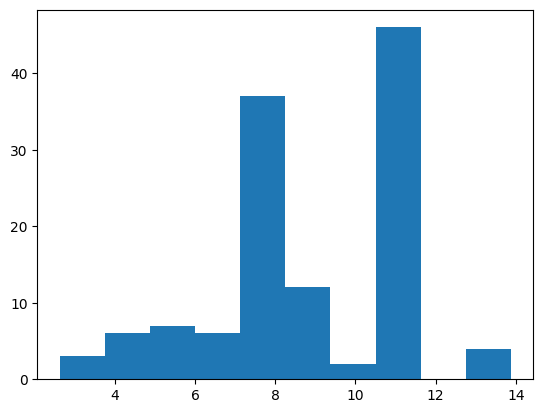

In [83]:
# model_age = [10.375, 7.75, 7.75, 7.75, 10.875, 7.75, 7.0, 9.125, 9.125, 7.75, 7.75, 
#              7.75, 7.75, 7.75, 7.75, 7.75, 9.5, 9.125, 9.125, 9.125, 9.375, 11.125,
#              11.0, 7.75, 7.75, 6.875, 9.125, 9.125, 9.125, 7.75, 7.75, 11.125, 7.875,
#              7.75, 11.0, 10.625, 7.875, 7.75, 7.75, 8.0, 13.875, 7.75, 7.75, 7.75, 9.375, 
#              7.75, 4.5, 9.125, 7.75, 8.375, 9.125, 11.0, 7.875, 7.75, 7.75, 11.25, 11.125,
#              11.125, 14.0, 11.375, 13.25, 11.25, 10.875, 10.875, 13.5, 11.375, 11.125, 5.625,
#              10.625, 10.875, 10.875, 4.5, 11.0, 9.5, 11.0, 7.5, 10.5, 13.5, 10.875, 11.125, 3.625,
#              11.125, 4.5, 7.75, 7.75, 11.0, 11.0, 9.125, 13.25, 11.25, 11.25, 11.0, 5.25, 11.0,
#              11.0, 11.375, 6.5, 6.125, 8.125, 8.0, 11.0, 5.375, 10.875, 10.875, 10.75, 11.125,
#              10.625, 13.625, 8.0, 11.0, 11.125, 7.75, 8.5, 7.75, 9. (0.4458251, 218.00183676552422)125, 11.125, 9.125, 7.75, 9.375, 7.75, 9.375, 9.375, 9.375]

model_age = [5.125, 7.5, 7.5, 7.5, 5.625, 7.5, 8.625, 9.125, 9.125, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 9.5, 9.125, 9.125, 9.125, 8.875, 11.0, 8.5, 7.5, 7.5, 7.625, 9.125, 9.375, 9.125, 7.5, 7.5, 11.25, 7.5, 7.5, 10.75, 4.125, 7.5, 7.5, 7.5, 7.5, 13.875, 7.5, 7.5, 7.5, 8.875, 7.5, 4.5, 9.125, 7.5, 6.375, 9.125, 11.0, 7.5, 7.5, 7.5, 11.0, 3.75, 6.5, 11.0, 11.125, 11.0, 11.0, 11.0, 10.625, 11.125, 5.625, 11.25, 5.625, 11.0, 10.875, 11.125, 4.5, 11.0, 6.875, 10.875, 5.875, 8.625, 13.375, 7.875, 5.375, 3.625, 10.625, 4.5, 7.5, 7.5, 11.0, 10.875, 8.875, 13.25, 10.75, 11.25, 11.125, 5.0, 10.875, 11.0, 2.875, 5.25, 6.25, 8.375, 8.375, 5.625, 5.375, 10.375, 10.875, 11.0, 10.75, 10.375, 11.0, 6.875, 11.0, 10.875, 11.125, 9.0, 7.5, 9.125, 5.375, 9.125, 7.5, 8.875, 7.5, 8.875, 8.875, 8.875]
gaia_age = [10.492706787312056, 4.049185106822373, 8.188901442026875, 8.414719376260468, 8.419918289328358, 9.18194139227426,
            4.2047716396525825, 6.462135547788246, 8.673526039960608, 7.303016495502723, 7.913709184591291, 6.524287979580443,
            2.3020665218908554, 9.52131334495254, 5.667635455954041, 8.658403467478065, 7.689376526326533, 7.306050850751609,
            6.49894813169104, 8.36923753544288, 4.606473157459815, 7.658620524675419, 6.409034306094594, 7.621139014630041, 
            7.69966594827434, 9.542232551361424, 8.550130248820683, 6.245619333346027, 5.388820499826756, 6.486189766921115,
            6.6766283736847045, 8.638946774208836, 9.144737344442147, 7.604056295216165, 11.890211384840207, 10.44097762740303, 
            8.108186675767149, 8.209320232875468, 7.185938291177668, 1.2022644346174132, 3.138091992588652, 7.0728831102601,
            7.968521796550558, 6.414305539878284, 6.631887225695847, 7.790273345612234, 10.063850624357947, 3.8766308500612534,
            8.3958562504334, 7.296098770198499, 9.110973794922188, 6.919550831137502, 5.176217119522614, 8.582771966539319,
            5.2535526532853485, 9.44064999425072, 6.1367092615251995, 5.407081073724173, 5.120288583072341, 5.932880064583159,
            3.430278981897814, 3.9014418166805584, 4.796147366142363, 3.204444603651678, 4.080813716758713, 8.38994840627828, 
            8.303661763602621, 3.6833369377858722, 6.464195733108559, 10.537911628906075, 9.602271892267645, 3.974745818419738,
            11.911940470855875, 6.747528650852982, 2.74315925216189, 7.085363847520638, 3.826818776171078, 4.018851347355751,
            11.694246060985169, 4.53924306952909, 8.4198948174231, 7.445560800192824, 3.240174373919763, 6.8883275733208995, 
            8.49099598034291, 4.993313189740381, 7.4479327247741445, 2.884196385533562, 10.748337622962966, 10.162660015917004,
            8.56540097254848, 10.718253433047494, 3.5662178091847148, 9.599561396135716, 6.665129157506707, 3.804931084988802,
            6.089770754595692, 5.808588572667736, 7.652566821269505, 7.266360683265732, 4.787881130364018, 5.798261561716642,
            5.5828864777233775, 7.728078988322596, 12.248430519587037, 3.6508534847001863, 8.599266332487733, 10.758492178403529, 
            9.821971999443047, 9.88402378199982, 12.589254117941662, 8.757934706579915, 5.781319854946127, 8.579145413734052, 
            7.265727586197693, 10.834206999676535, 6.759317260909356, 10.575998531998449, 6.727787107296525, 7.610609938430218,
            8.04329617527318, 9.097232991817338, 8.955265154228975]

model_gaia_age = []
for i in range(len(gaia_age)):
    model_gaia_age.append((model_age[i],gaia_age[i]))
plt.hist(model_age)

In [84]:
diff = []
for i in range(len(model_age)):
    diff.append(np.abs(model_age[i]-gaia_age[i]))

(array([0.28811573, 0.18954982, 0.13647587, 0.07581993, 0.08340192,
        0.09098391, 0.01516399, 0.03790996, 0.00758199, 0.00758199]),
 array([ 0.01402621,  1.08631439,  2.15860257,  3.23089075,  4.30317893,
         5.37546711,  6.44775529,  7.52004347,  8.59233165,  9.66461983,
        10.73690801]),
 <BarContainer object of 10 artists>)

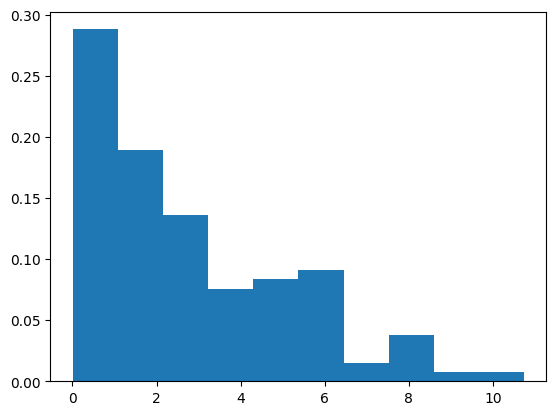

In [85]:
plt.hist(diff,density = 'true')

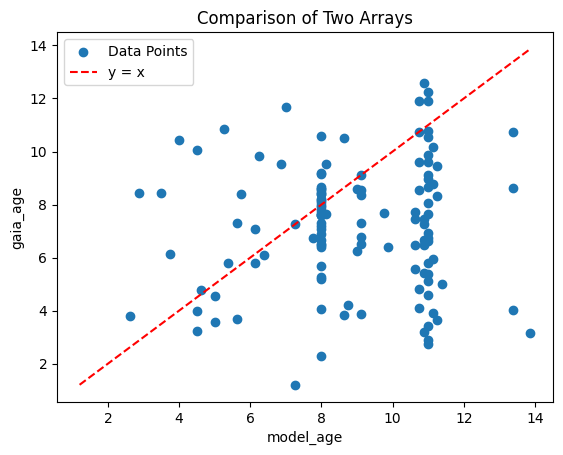

In [86]:
import matplotlib.pyplot as plt
import numpy as np


model_age = np.array(model_age)
gaia_age = np.array(gaia_age)
# Create scatter plot
plt.scatter(model_age, gaia_age, label='Data Points')

# Plot y = x line
plt.plot([min(model_age.min(), gaia_age.min()), max(model_age.max(), gaia_age.max())],
         [min(model_age.min(), gaia_age.min()), max(model_age.max(), gaia_age.max())],
         color='red', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('model_age')
plt.ylabel('gaia_age')
plt.title('Comparison of Two Arrays')
plt.legend()
200
# Show plot
plt.show()

In [31]:
plt.plot(distance,diff)

NameError: name 'distance' is not defined

In [104]:
age_distance = [(10.695397025265615, 1915.9472934821913), (8.747884019719413, 385.8862432178492), (5.176661611860324, 1526.4519033324432), (9.463492720632422, 1437.8603504981018), (4.7340442184197835, 2668.3444206416375), (7.440434061910102, 1604.6577238845114), (8.180844118823591, 1575.286900788221), (4.5917604449356, 1775.676788205294), (4.4911714763662935, 2598.5785555408706), (8.078989893043376, 2849.0023947009845), (7.311232483911919, 2081.5511556212427), (6.112233854565421, 2468.8838293771005), (6.9547366651324, 2047.8928200797834), (9.430978804135625, 2118.9951905265125), (4.060173842677838, 266.5393260979286), (4.267450636157277, 1302.5366816361866), (6.813482875753825, 2958.8401820044073), (5.7810288249012975, 1645.3615373367704), (11.131868758868604, 6366.413706541099), (3.798333905937477, 523.4950969877481), (5.313856918871412, 2553.3003419078923), (1.4454397707459279, 345.66625619844103), (5.978053106689981, 1711.3651209159148), (4.1701065159489055, 7156.3751508932155), (7.554580788885934, 982.036151392121), (4.229590522411107, 1765.5679322370527), (4.371616611471598, 1548.1973032676515), (4.091213688240091, 1377.0980696065915), (5.487061193426282, 3549.38322573135), (8.603199051605765, 809.4550057746953), (10.331749525757246, 1333.0616921163476), (8.455163957059408, 614.0942147731573), (6.868674749109062, 1380.4624120719877), (6.746636525061241, 5083.0554027393855), (8.044961455288226, 3634.529804171786), (5.669829147534817, 1765.636753112911), (7.348245570675119, 1289.5351537350753), (6.5473624522379845, 1744.1516983645795), (3.435750440992117, 397.41951249434027), (4.452106723613307, 1119.2902716995866), (8.260570303449056, 2335.080866866439), (5.85897671975243, 1367.5916590206014), (6.950834672324868, 540.0039016819725), (5.401230907954288, 1472.227901766573), (3.227380099870944, 5422.6801698555655), (7.167982055409436, 3808.559878941555), (3.525631821041237, 254.32048698333568), (3.415882839995196, 1423.152861390624), (8.880553775467789, 776.9464741380879), (6.829326007910347, 810.0574257943427), (6.04715131493596, 2342.5309376362375), (2.4724940911910496, 1604.7511582940745), (3.601961154682703, 1405.5499364675768), (9.99265969677544, 554.801543596912), (8.886636137749313, 1631.0007383947534), (10.88669006750832, 534.7539142605889), (3.14196590038234, 927.7959297826918), (8.894880791953543, 1264.278316223448), (6.599217391382939, 632.3804802817496), (5.238729658628667, 1543.5813344496753), (4.145291415656798, 3462.603861187859), (7.185653964453612, 1226.5755166951544), (9.857136259055846, 3387.7766443831856), (8.435992786404329, 754.2648195862631), (11.755890680431904, 1143.5504925073396), (6.133710953411494, 1041.7843597462104), (8.226276053551885, 2042.9049178021457), (5.202809064819836, 1315.1325774649263), (4.997844248511751, 1406.8648767511847), (7.067866941234024, 3001.006721181953), (8.259079242714865, 352.00012132881346), (8.663981230430277, 1148.3332113925796), (9.856350895135847, 1239.162397071264), (4.150236999821856, 1301.5455353095053), (9.571400605895683, 2409.9041849446253), (3.227238298004319, 1797.3269442730534), (8.443619737357439, 1465.4005074425402), (7.279765412358538, 1382.396946435716), (3.7971332776298, 1272.135530143147), (9.180066347377455, 1702.6805815431014), (10.214307332713677, 2822.6502366216287), (11.96082027309897, 1558.2408903896376), (8.306166183062956, 1347.0411678010985), (8.245801441530507, 2917.095016518795), (4.575697524098084, 1827.6866407788875), (3.6124815379542468, 5581.782150411411), (8.95717146921744, 2608.79689826466), (9.685159259918857, 1495.8895183317888), (9.594445442029889, 4573.798358701096), (5.340717833673379, 1643.0729238815143), (11.385719085210914, 2311.763406705763), (7.403429390882291, 1807.1685531129503), (5.787449727028365, 2128.0013638618716), (8.777321478935225, 394.67053205930574), (9.926518318091983, 1019.2352534935711), (4.814753841847696, 907.2472648996126), (7.7560809783778035, 696.0807977794733), (5.187660877189618, 1247.9899536933167), (3.0903863787293213, 1637.2308299792708), (3.737015000336877, 1552.5092309931763), (7.0985754355153174, 1947.3411732965126), (8.144814241919011, 666.4446747881906), (9.216848741287452, 2810.556189032924), (7.683886280882724, 1322.089192526326), (10.885355287626949, 1854.6850083033376), (8.09692573785863, 5160.8479510891075), (11.055821094647959, 1927.497167570035), (8.280769641620042, 1500.8879664452127), (4.949677365367725, 5003.797671660002), (9.10394661798164, 1521.301245032677), (7.4727713691563835, 686.5031029315232), (6.419056776379301, 1159.9009872394315), (9.035134542618087, 726.0282034848534), (6.310773983784291, 1690.3516978724303), (6.233305860133866, 2335.1740951950246), (6.427825213859562, 1318.2558355033052), (9.459880710906717, 2499.451227576626), (7.790750929885476, 825.8949448672646), (8.698766707534821, 1491.905634759866), (2.3857074600980694, 1698.4916044720562), (9.139988063788962, 1072.3894113908104), (10.800405883112964, 1099.033403060242), (7.852867381685643, 2071.096259795992), (10.07014167567192, 1558.0840501940227), (8.363072440492399, 1571.9777724695662), (10.203920252063174, 1338.8733829215648), (6.261888053776602, 2488.5161028248617), (9.727862684396099, 1963.2363598181382), (6.662362262673825, 1642.4002042191228), (8.277546004255012, 691.6305934221165), (9.194838139074783, 2032.9885075224818), (7.771260631695444, 1643.1539933704712), (7.635168745067952, 1416.2461596458709), (6.78808102158282, 1543.7506141173335), (8.0048156137582, 2988.4288044229547), (10.377684002550028, 1652.220369310517), (8.774555348297751, 2507.3623880318532), (7.659063536733148, 2107.8882230012377), (6.913292729102358, 1943.8464195820443), (6.416658538393802, 2906.137060679535), (7.889698998812545, 349.4520321262224), (5.16632514530783, 1623.7155590362026), (11.766986054283176, 1455.1798229609592), (3.447435726444579, 1289.3684372333962), (6.266059172999828, 2241.656292536672), (8.470363909269654, 1314.1994692244657), (8.286391390818848, 1466.8283511429652), (8.3333459966995, 2902.2814260001455), (6.51728786209708, 409.9117338258058), (6.3636790215462415, 4562.3951482717175), (8.19365115291212, 689.9704964396616), (9.028528426547032, 508.1320824545467), (7.217389414623145, 654.6577820512387), (6.640820219848246, 5392.199794180913), (4.920766081974914, 752.1631102161265), (8.442321706987801, 2310.9270734412667), (9.491928032470254, 3181.652120892232), (5.7064089172715455, 1726.374323558986), (6.017463286947345, 1598.1629421047683), (8.941653975979673, 2070.7918045661386), (10.734903187156704, 1755.4138828552095), (10.50453348880273, 988.4446225669888), (7.015772665412173, 457.15954677877653), (8.907202870004866, 1142.6237650174214), (9.629487526517385, 1512.9664146995358), (8.486213626080696, 1432.3809122190337), (8.364030572250863, 1032.2650789480879), (4.424471141043508, 628.3099398464705), (6.624263108862067, 1344.9406355458345), (8.979967173828012, 1340.2679400243967), (7.757076259674246, 391.38321749254897), (8.416662134212563, 1202.8610900246247), (8.034614836346828, 2900.1505901411006), (3.368710578943982, 1274.6879117176763), (8.228774186055634, 804.53120296952), (7.119934557467878, 1644.7451448411773), (3.4835636875251974, 406.97393180582674), (6.306084236073361, 888.5963335337423), (5.884173904316433, 1229.7618770871627), (7.161602625595582, 1618.4969877790743), (7.878637813776431, 1162.2183269955203), (3.9514568818144373, 1756.6755722630712), (10.692862524119935, 1492.6615209479567), (2.059335434232659, 814.7747397783121), (7.3197847727472425, 2973.4924772337904), (7.855420456326342, 3312.8749811086313)]
feh_distance = [(-1.9655628, 1915.9472934821913), (-0.6602011, 385.8862432178492), (-0.010685921, 1526.4519033324432), (-0.31742668, 1437.8603504981018), (-0.0008454323, 2668.3444206416375), (-0.020599842, 1604.6577238845114), (0.18461084, 1575.286900788221), (0.31186485, 1775.676788205294), (0.062198162, 2598.5785555408706), (-0.011017799, 2849.0023947009845), (0.17635965, 2081.5511556212427), (0.031745434, 2468.8838293771005), (0.26342344, 2047.8928200797834), (-0.014547348, 2118.9951905265125), (-0.2607026, 266.5393260979286), (0.08731556, 1302.5366816361866), (0.31151056, 2958.8401820044073), (-0.2071166, 1645.3615373367704), (-0.47093582, 6366.413706541099), (-0.4548993, 523.4950969877481), (0.21538591, 2553.3003419078923), (-1.3528228, 345.66625619844103), (-0.07031202, 1711.3651209159148), (0.26658154, 7156.3751508932155), (-0.24999523, 982.036151392121), (-0.10606527, 1765.5679322370527), (0.056895256, 1548.1973032676515), (0.09718132, 1377.0980696065915), (0.09089804, 3549.38322573135), (-0.37557554, 809.4550057746953), (-0.3178811, 1333.0616921163476), (-0.035365105, 614.0942147731573), (-0.3146758, 1380.4624120719877), (-0.027410984, 5083.0554027393855), (-0.12761927, 3634.529804171786), (0.23591661, 1765.636753112911), (-0.4496932, 1289.5351537350753), (-0.30507994, 1744.1516983645795), (-0.5898223, 397.41951249434027), (-0.7407856, 1119.2902716995866), (-0.14209986, 2335.080866866439), (-0.15741777, 1367.5916590206014), (-0.31338406, 540.0039016819725), (-0.073749065, 1472.227901766573), (0.1146574, 5422.6801698555655), (-0.3949833, 3808.559878941555), (-1.3836918, 254.32048698333568), (-0.042073727, 1423.152861390624), (-0.13751507, 776.9464741380879), (-0.29373884, 810.0574257943427), (-0.12839174, 2342.5309376362375), (0.109410286, 1604.7511582940745), (-0.30943823, 1405.5499364675768), (-0.25673485, 554.801543596912), (0.108204365, 1631.0007383947534), (-0.5923848, 534.7539142605889), (0.1018157, 927.7959297826918), (-0.05762291, 1264.278316223448), (-0.08953667, 632.3804802817496), (-0.037264824, 1543.5813344496753), (-0.019340038, 3462.603861187859), (-0.05741787, 1226.5755166951544), (-0.09988785, 3387.7766443831856), (-0.19524002, 754.2648195862631), (-0.9458413, 1143.5504925073396), (-0.1156311, 1041.7843597462104), (-0.112220764, 2042.9049178021457), (-0.12436676, 1315.1325774649263), (-0.029162407, 1406.8648767511847), (-0.395689, 3001.006721181953), (-0.14902163, 352.00012132881346), (-0.6430793, 1148.3332113925796), (-0.22165155, 1239.162397071264), (-0.28370857, 1301.5455353095053), (-0.5963793, 2409.9041849446253), (0.20346022, 1797.3269442730534), (-0.25833082, 1465.4005074425402), (-0.30029345, 1382.396946435716), (-0.512372, 1272.135530143147), (-0.47377396, 1702.6805815431014), (-0.20064163, 2822.6502366216287), (-0.89449596, 1558.2408903896376), (-0.11905146, 1347.0411678010985), (-0.046399117, 2917.095016518795), (-0.14268017, 1827.6866407788875), (0.019105434, 5581.782150411411), (-0.30780506, 2608.79689826466), (-0.5065646, 1495.8895183317888), (-0.3640108, 4573.798358701096), (-0.51426697, 1643.0729238815143), (-0.14376211, 2311.763406705763), (-0.49126673, 1807.1685531129503), (-0.06956339, 2128.0013638618716), (-0.26054096, 394.67053205930574), (-0.24425316, 1019.2352534935711), (-0.24488115, 907.2472648996126), (-0.30987883, 696.0807977794733), (0.3437457, 1247.9899536933167), (-0.11576891, 1637.2308299792708), (-0.051457882, 1552.5092309931763), (0.091053486, 1947.3411732965126), (-0.28864145, 666.4446747881906), (-0.1932888, 2810.556189032924), (-0.11528015, 1322.089192526326), (-0.46766472, 1854.6850083033376), (0.11449909, 5160.8479510891075), (-0.5737157, 1927.497167570035), (-0.19263315, 1500.8879664452127), (-0.042565346, 5003.797671660002), (-0.2324028, 1521.301245032677), (-0.29083347, 686.5031029315232), (-0.2743559, 1159.9009872394315), (-0.5024934, 726.0282034848534), (-0.20618486, 1690.3516978724303), (-0.051273346, 2335.1740951950246), (0.18319082, 1318.2558355033052), (0.10461855, 2499.451227576626), (-0.5382595, 825.8949448672646), (-0.58507633, 1491.905634759866), (0.00024700165, 1698.4916044720562), (-0.47833586, 1072.3894113908104), (-0.59908533, 1099.033403060242), (-0.073345184, 2071.096259795992), (0.11957836, 1558.0840501940227), (-0.051561832, 1571.9777724695662), (-0.38674784, 1338.8733829215648), (0.22463703, 2488.5161028248617), (-0.114326954, 1963.2363598181382), (-0.06558609, 1642.4002042191228), (0.023799896, 691.6305934221165), (-0.47614813, 2032.9885075224818), (-0.25446033, 1643.1539933704712), (-0.1263566, 1416.2461596458709), (-0.1759758, 1543.7506141173335), (-0.40950012, 2988.4288044229547), (-0.14676476, 1652.220369310517), (-0.33206654, 2507.3623880318532), (0.36287546, 2107.8882230012377), (0.08830261, 1943.8464195820443), (-0.031390667, 2906.137060679535), (-0.18929529, 349.4520321262224), (-0.5270562, 1623.7155590362026), (-0.6054168, 1455.1798229609592), (-0.1668477, 1289.3684372333962), (-0.03841448, 2241.656292536672), (-0.12618017, 1314.1994692244657), (-0.09106398, 1466.8283511429652), (-0.10578728, 2902.2814260001455), (0.033071995, 409.9117338258058), (0.25063705, 4562.3951482717175), (-0.1724019, 689.9704964396616), (-0.59720945, 508.1320824545467), (-0.13643551, 654.6577820512387), (-0.04595852, 5392.199794180913), (0.09911728, 752.1631102161265), (-0.25641918, 2310.9270734412667), (-0.6137471, 3181.652120892232), (-0.03940916, 1726.374323558986), (-0.49913263, 1598.1629421047683), (0.030992508, 2070.7918045661386), (-0.16848898, 1755.4138828552095), (-0.17523098, 988.4446225669888), (-0.23480225, 457.15954677877653), (-0.31189013, 1142.6237650174214), (-0.42384768, 1512.9664146995358), (-0.5205412, 1432.3809122190337), (-0.4488001, 1032.2650789480879), (-0.41523504, 628.3099398464705), (-0.041716576, 1344.9406355458345), (-0.14351368, 1340.2679400243967), (-0.51029396, 391.38321749254897), (-0.23624039, 1202.8610900246247), (-0.24882412, 2900.1505901411006), (-0.83055496, 1274.6879117176763), (-0.70308113, 804.53120296952), (-0.08164787, 1644.7451448411773), (-0.5300188, 406.97393180582674), (-0.064228535, 888.5963335337423), (0.09332228, 1229.7618770871627), (-0.3523202, 1618.4969877790743), (0.38782024, 1162.2183269955203), (-0.19968367, 1756.6755722630712), (0.058367252, 1492.6615209479567), (-0.17494631, 814.7747397783121), (0.11562252, 2973.4924772337904), (0.19944382, 3312.8749811086313)]
age_data = []
feh_data = []
for i in range(len(age_distance)):
    age_data.append(age_distance[i][0])

for i in range(len(feh_distance)):
    feh_data.append(feh_distance[i][0])
print(len(feh_data))


186


            0
0   -1.965563
1   -0.660201
2   -0.010686
3   -0.317427
4   -0.000845
..        ...
181 -0.199684
182  0.058367
183 -0.174946
184  0.115623
185  0.199444

[186 rows x 1 columns]


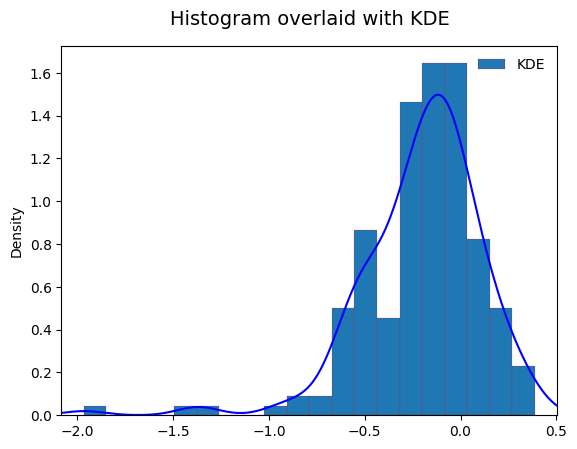

In [106]:
feh = feh_data
feh = pd.DataFrame(feh)
print(feh)
# random number generator

# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
ax = feh.plot.hist(bins=20, density=True, edgecolor='red', linewidth=0.125)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
feh.plot.density(color='blue', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

In [23]:
# conditional_pdf_values_prob = [2.7,3.4,2.2,6.5,2,2,4.5,1.2,1.3]
# sum_pdf = np.sum(conditional_pdf_values_prob)
# temp = 0
# age_peak = []
# for i in range(len(conditional_pdf_values_prob)):
#     temp = temp + conditional_pdf_values_prob[i]
#     if temp > sum_pdf/2:
#         break
# age_peak.append(i)
# print(age_peak) 

[3]


        0
0   8.875
1   4.875
2   2.125
3   1.500
4   6.125
..    ...
87  6.875
88  9.125
89  8.375
90  5.125
91  8.250

[92 rows x 1 columns]


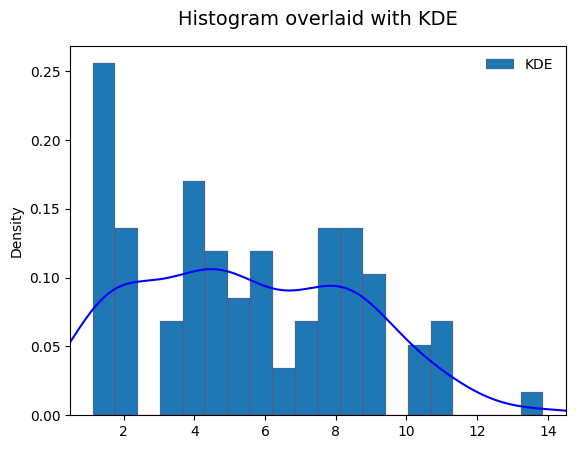

In [72]:
age = [8.875, 4.875, 2.125, 1.5, 6.125, 11.125, 1.625, 8.375, 10.25, 5.25, 2.0, 1.75, 8.875, 9.0, 13.875, 2.0, 2.375, 2.0, 7.0, 1.875, 10.625, 4.25, 3.75, 5.625, 8.375, 2.0, 8.0, 1.25, 8.875, 1.375, 8.0, 7.625, 7.0, 5.125, 1.25, 3.75, 3.75, 8.125, 3.625, 4.5, 1.5, 6.125, 3.625, 3.5, 1.125, 7.875, 4.25, 1.25, 8.625, 5.75, 7.375, 4.75, 4.0, 6.25, 4.625, 5.0, 2.25, 4.625, 10.875, 1.5, 4.5, 6.5, 1.25, 5.0, 7.625, 6.125, 4.625, 4.25, 4.25, 7.875, 4.25, 11.125, 8.5, 10.125, 8.875, 7.75, 10.75, 3.75, 1.75, 8.625, 1.25, 6.125, 1.625, 8.5, 1.5, 3.125, 5.625, 6.875, 9.125, 8.375, 5.125, 8.25]
age = pd.DataFrame(age)
print(age)
# random number generator

# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
ax = age.plot.hist(bins=20, density=True, edgecolor='red', linewidth=0.125)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
age.plot.density(color='blue', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

In [26]:
gaia_age = [5.29846526952319, 2.0121141494969192, 5.178604082517033, 12.275144124572291, 11.752464268653402, 
            6.466258953340247, 8.820160550591927, 3.6250263271811045, 7.7810538034371435, 11.219801014771155, 
            6.898226785777026, 7.007787179154753, 9.679843450906917, 6.757648171393861, 1.7675862374850122, 9.396981830501183,
            5.382073895994643, 1.9037257089433606, 4.53048964612016, 8.454212712643681, 8.702125405036861, 7.361778940528379, 
            9.458336413451923, 8.071442251471568, 10.240348591169504, 6.890699746025384, 5.517737320623948, 2.5463286976620885,
            8.442530706583499, 8.316365169285627, 7.242125207416734, 6.7439542097280745, 10.011207613545189, 6.22677230015335,
            5.259910309943211, 10.605514204563447, 12.306547793219512, 8.723542571785712, 4.7446195460634435, 4.887578627162207,
            6.177306532720343, 9.240272662923855, 3.200838829208077, 4.532253497803861, 11.206139871250887, 9.787993187105343, 
            7.5478906744189205, 6.3207157957433875, 5.936347477148406, 4.1728148585923, 9.617453279094333, 3.274082791937588, 
            7.918975593056488, 3.4183546809564977, 7.394279679724208, 5.884776389625791, 7.537420353791814, 9.240450616680079,
            2.4306026042785303, 10.088407275226805, 11.416750877315904, 8.634626492375565, 7.161645484392836, 9.861993495306105, 
            6.581839812843408, 6.2497101834335975, 9.583577558637906, 8.111092893574655, 9.400706775725018, 7.45953109883905, 
            3.158074608760787, 10.222849210377824, 7.107120844879161, 10.479606002874359, 6.663095157376228, 8.126498551178123, 
            7.357748253434409, 8.251874552225013, 11.154965914728923, 5.496011961698702, 8.146986651405022, 4.938143727912069,
            7.212363785701141, 3.215795807908427, 2.5092340627548038, 6.576260224693029, 8.925318212248097, 5.70961430668616, 
            8.564126634197036, 3.064363214976167, 6.624469807107267, 5.4788249002677905, 9.219334712771396, 3.3589664881030767, 
            6.535850308108168, 2.7831179533827064, 10.564195610357016, 6.976313519337293, 5.369214872596043, 8.925955004653513, 
            8.693162974898009, 8.555176143513602, 4.980388790089782, 5.142390426064978, 8.885479195217814, 7.846448611633304, 
            11.204676980293371, 1.9882027575097414, 8.427386961190814, 9.655267383750708, 4.494973989412745, 5.44217559728585,
            9.817510096139127, 8.899395592758522, 3.2784839626090765, 2.7992239896106823, 1.545421756395194, 4.810302655513969,
            2.4639848255957504, 7.746701480774497, 10.057856070945965, 2.8997446690669832, 9.936132445188397, 3.4822954603875105,
            5.948509067885127, 8.072299804696122, 5.031841168565288, 5.4740941918154515, 5.524754911563788, 11.248082999053414, 
            10.105813327743995, 8.260306372819787, 10.986482367942143, 5.81907579625359, 6.494114878877556, 3.7271366209575283, 
            5.746986370319697, 8.46983736914455, 10.086908888612466, 3.804250116105393, 8.261111475862627, 5.890857570155568, 
            3.91240256809241, 9.955371100826053, 6.165303949917774, 2.1189971156080407, 4.351355691628348, 8.855405334464129, 
            9.5637112896138, 6.699473673440719, 3.1346035505546244, 9.079350657869039, 8.580623658068147, 6.348626660777074, 
            5.9687423320218755, 8.742690277307002, 7.5828084576523676, 6.378731077164166, 7.962018690835438, 3.6244772593278323,
            9.364288699045193, 5.303662314707218, 1.5132440132172784, 3.838189361581711, 6.567229708613223, 9.099397235615276,
            6.564465922499489, 11.46675232824554, 2.892470378070965, 3.7932083954489575, 4.789125304851775, 4.396742504136501, 
            4.576066632158706, 8.07438996614646, 9.093725336767315, 8.034660472579413, 7.45565395635066, 4.726003739542078,
            9.036150488001331, 3.8201112185394077, 4.3651583224016655, 9.544088645105322, 3.21657096559161, 7.575788353251194, 
            9.729334295719227, 3.007079359632659, 2.8184904091341223, 4.440812497791766, 8.259227239323076, 9.83857877024067, 
            4.436438457928068, 3.2792626573809485, 5.207880710516351, 5.068947690803286, 3.0471070416513713, 6.800179499812707,
            3.777864944570709, 7.624000378471124, 4.115291407087124, 3.465719398681337, 8.413619526158085, 10.93860448575302,
            7.4463239079487, 7.9914012883457355, 5.079346240361673, 6.534117811056904, 8.807246959626204, 9.832787465100868,
            3.402325112808602, 9.81906343402566, 4.0354789644388775, 3.3705389331405278, 2.3209231509987283, 2.7839624721053773, 
            5.97946627075279, 8.573299636270583, 4.708504252513611, 8.163444234609136, 3.745643291162152, 3.59444221192147,
            8.364804725029801, 8.468758878760664, 11.066068618341388, 7.522331862863514, 9.062568093148649, 7.001949060531365, 
            5.643133873368928, 6.640091583465241, 9.368238740284276, 8.572999280112068, 8.896412559526468, 5.5432027796351635, 
            9.075483335464444, 8.503855112270651, 5.899066575518606, 8.707082687089741, 5.5807481755306405, 10.030726532436201, 
            7.91661210633542, 3.777687004549916, 10.671098268771187, 5.751448829925573, 6.329543028257221, 8.644532056136265, 
            9.859574534758407, 7.354955993925348, 6.040164523498712, 3.4318631492223672, 8.77341194594717, 3.917395363513242, 
            2.898606684588377, 3.9384496026995732, 8.826971111511336, 1.3182567385564048, 5.680408688480739, 7.53603533356041, 
            8.361658133250161, 8.538697169342086, 7.229062974392602, 7.311576507944135, 6.30590556169113, 4.224626641861892,
            8.287009479888463, 6.904753900130777, 10.77576842311826, 10.677017672531102, 12.320373745085014, 3.293007548654187,
            10.000750990835945, 5.254587456820002, 4.302283067774145, 5.7093768410190755, 5.458746295944627, 6.12618060128505, 
            5.679183055513644, 5.415646011619208, 9.676824468220543, 4.773003970553119, 1.7899659101898366, 4.418390213810438, 
            7.191738499778033, 7.784884518300255, 10.329290445128093, 7.24812820203961, 4.145527685059916, 5.195879654562007, 
            4.4156702837148325, 8.904166666340377, 4.480418541400835, 7.60651650972772, 2.637211644249258, 6.6022948203404255, 
            10.081627604113466, 4.341461761528026, 6.768566407766496, 9.433634926889443, 9.723241670405892, 8.109056918237853,
            4.996321918929458, 3.9446967408850475, 4.290283430524061, 9.16578383290169, 8.50158486287935, 6.956074312312962, 
            4.350205384684993, 4.794030216102224, 10.702522655679587, 4.510014194054743, 5.990543515781775, 6.076661226371424, 
            9.32555662733098, 9.312323001000763, 6.957669685702747]


age_peak = [10.875, 8.625, 11.0, 9.125, 4.125, 6.5, 8.375, 6.0, 11.0, 10.75, 5.375, 5.0, 10.625, 2.75, 4.875, 10.625, 11.125, 
 11.25, 5.375, 10.875, 5.75, 8.125, 6.25, 11.125, 5.625, 9.25, 13.625, 9.25, 8.25, 13.5, 13.5, 11.0, 6.375, 10.875, 
 8.25, 7.125, 6.25, 3.375, 11.125, 5.375, 6.25, 6.375, 6.25, 4.25, 11.25, 9.125, 9.625, 5.0, 6.375, 8.25, 7.375, 7.75, 
 9.625, 9.125, 4.5, 11.0, 11.125, 11.375, 10.875, 6.75, 11.25, 6.375, 11.125, 6.625, 5.75, 6.0, 5.375, 8.875, 8.625, 
 3.0, 11.125, 3.125, 5.0, 11.125, 11.0, 10.625, 11.125, 5.625, 11.0, 6.0, 6.625, 11.125, 11.0, 5.625, 11.0, 5.5, 9.0, 
 6.0, 11.125, 5.625, 5.375, 11.0, 11.125, 6.0, 6.0, 5.125, 5.75, 8.25, 5.625, 11.125, 10.875, 8.375, 6.5, 8.375, 6.375, 
 11.0, 6.5, 7.375, 9.0, 3.5, 9.5, 6.125, 5.625, 5.125, 5.625, 5.625, 11.0, 3.5, 11.0, 9.25, 9.125, 8.625, 3.375, 6.0, 
 6.0, 11.0, 11.25, 4.125, 4.875, 8.5, 11.0, 9.375, 5.625, 6.75, 5.625, 5.5, 6.875, 5.375, 8.375, 13.625, 8.0, 8.625, 
 7.375, 10.875, 9.5, 8.0, 11.125, 8.25, 9.0, 11.125, 6.5, 8.875, 11.125, 3.0, 4.375, 5.0, 10.375, 10.875, 11.125, 6.875, 
 7.375, 8.25, 11.0, 8.375, 11.0, 11.0, 10.875, 4.625, 5.375, 11.0, 3.375, 5.0, 5.25, 9.125, 6.125, 6.375, 9.0, 4.875, 
 9.0, 5.625, 6.0, 7.0, 11.25, 7.375, 6.125, 11.375, 10.75, 11.125, 9.25, 6.0, 3.875, 5.375, 11.125, 5.5, 10.75, 10.875, 
 13.375, 11.125, 4.875, 5.375, 9.0, 11.125, 10.875, 9.125, 10.875, 10.875, 11.0, 13.875, 11.0, 5.375, 5.625, 6.25, 5.625,
 8.125, 10.875, 6.0, 5.5, 6.625, 6.0, 5.25, 6.5, 6.125, 11.0, 5.875, 11.125, 5.25, 8.625, 11.0, 11.0, 8.0, 11.125, 8.25, 
 6.25, 5.125, 6.0, 5.0, 11.0, 11.0, 8.25, 13.25, 9.0, 6.0, 8.0, 4.625, 11.125, 5.375, 9.625, 11.125, 8.0, 6.375, 4.75, 4.75, 
 8.25, 8.5, 4.5, 11.25, 3.75, 11.125, 4.5, 6.5, 7.0, 11.0, 5.875, 9.0, 11.0, 11.125, 11.125, 6.5, 6.25, 6.625, 5.625, 11.25, 
 11.125, 4.5, 10.875, 11.125, 8.25, 13.375, 6.25, 5.5, 6.0, 11.0, 5.375, 9.25, 11.125, 14.0, 14.0, 6.5, 11.125, 9.375, 11.0, 
 13.5, 11.0, 11.125, 6.0, 11.125, 5.5, 9.0, 11.0, 11.125, 11.125, 10.75, 8.0, 13.5, 8.75, 10.75, 4.875, 10.75, 7.375, 7.375, 
 11.125, 7.5, 8.375] 

age_median_peak = [11.0, 7.625, 10.75, 9.375, 7.25, 7.0, 7.625, 6.5, 11.0, 10.5, 5.5, 4.875, 10.0, 5.0, 5.375, 10.0, 11.125, 
11.125, 5.25, 11.0, 5.5, 8.5, 7.875, 9.375, 5.375, 9.0, 12.125, 9.0, 8.125, 11.875, 12.875, 11.875, 7.125, 11.0, 8.125, 8.125, 
 5.75, 4.125, 11.0, 5.25, 6.375, 6.375, 6.75, 4.875, 11.0, 8.75, 9.0, 4.75, 6.5, 8.0, 7.25, 7.625, 9.0, 8.375, 5.125, 10.25, 11.125, 
 11.375, 11.0, 6.375, 11.0, 6.5, 11.125, 6.875, 6.25, 5.875, 6.875, 8.5, 8.875, 4.0, 11.125, 5.125, 5.375, 11.125, 11.0, 7.625,
 11.125, 5.625, 11.0, 6.375, 6.5, 11.125, 11.0, 5.125, 10.875, 5.625, 9.25, 5.75, 11.125, 5.75, 5.25, 10.375, 10.625, 6.625, 
 5.75, 5.375, 5.625, 8.125, 5.625, 11.125, 10.75, 8.75, 6.875, 7.875, 6.5, 11.0, 6.875, 7.375, 8.75, 4.625, 7.875, 6.75, 6.125, 
 6.0, 5.625, 5.375, 11.0, 4.375, 9.5, 9.25, 9.0, 7.875, 4.25, 5.875, 6.375, 10.875, 11.0, 6.0, 5.625, 8.25, 11.0, 8.625, 5.625, 
 6.375, 5.625, 5.5, 6.375, 6.75, 8.75, 11.875, 8.5, 7.75, 8.5, 11.0, 9.125, 7.875, 11.125, 8.75, 8.625, 11.125, 6.25, 8.5, 11.0, 
 4.375, 6.0, 5.5, 8.125, 11.0, 9.375, 6.625, 7.25, 8.375, 11.25, 8.125, 11.0, 11.0, 10.75, 7.0, 5.5, 11.0, 4.125, 5.125, 5.375,
 8.75, 5.125, 6.625, 8.75, 6.625, 8.875, 5.375, 5.625, 7.125, 11.125, 7.125, 6.5, 10.875, 10.25, 11.125, 9.25, 5.25, 4.75, 5.625,
 11.125, 5.5, 10.0, 10.625, 12.0, 11.25, 6.375, 6.75, 8.75, 11.125, 10.75, 9.25, 10.875, 10.875, 11.375, 13.875, 11.5, 6.875, 
 5.875, 5.75, 7.125, 8.125, 11.125, 6.5, 5.875, 6.875, 6.0, 6.75, 5.875, 6.375, 11.125, 5.25, 11.125, 6.0, 6.875, 11.125, 11.0, 
 8.125, 11.0, 9.125, 6.0, 5.375, 6.875, 5.0, 10.625, 11.125, 8.125, 12.625, 8.625, 5.75, 6.625, 5.875, 11.0, 5.375, 9.125, 11.125, 
 8.5, 6.25, 5.125, 5.0, 8.125, 9.0, 5.875, 11.25, 4.75, 11.0, 7.25, 5.875, 6.625, 9.625, 5.875, 8.875, 11.375, 11.0, 11.0, 6.875,
 6.625, 6.375, 8.5, 11.0, 11.0, 5.875, 10.125, 11.0, 8.125, 12.25, 6.25, 6.0, 5.75, 10.875, 5.25, 9.0, 11.25, 14.0, 14.0, 6.625, 
 11.0, 8.75, 11.125, 12.125, 11.375, 11.25, 6.125, 11.125, 5.875, 8.75, 11.25, 10.625, 11.25, 10.125, 8.5, 12.25, 7.0, 10.875, 6.25,
 10.875, 7.25, 7.0, 11.125, 8.0, 9.0]

age_16_percent = [10.625, 4.875, 9.125, 7.125, 3.875, 5.25, 5.25, 4.625, 10.375, 8.25, 4.25, 2.875, 6.75, 
2.5, 3.25, 7.5, 10.5, 10.5, 3.0, 10.375, 3.25, 5.875, 5.625, 7.0, 3.375, 6.625, 10.5, 6.625, 6.375, 10.625, 10.75, 10.625, 4.875, 
10.625, 6.375, 5.875, 3.875, 2.125, 10.25, 3.375, 4.25, 3.625, 5.0, 2.875, 10.5, 6.0, 6.875, 2.375, 4.125, 6.25, 4.75, 5.625, 
6.875, 5.875, 2.75, 7.875, 9.5, 10.625, 10.375, 4.125, 10.125, 4.25, 10.5, 4.75, 3.875, 4.0, 4.75, 6.0, 7.5, 1.875, 10.5, 2.75, 
3.75, 10.5, 10.5, 3.875, 10.5, 3.875, 10.375, 4.0, 4.25, 10.5, 10.5, 2.875, 9.375, 3.75, 7.5, 3.5, 10.625, 3.75, 3.25, 6.875, 8.375, 
4.875, 3.5, 3.625, 3.0, 6.375, 3.875, 10.5, 9.375, 7.125, 4.875, 5.375, 4.25, 10.375, 5.0, 5.375, 6.25, 2.375, 4.125, 4.75, 4.0, 3.875,
3.75, 3.375, 10.375, 2.5, 5.25, 7.375, 6.625, 5.625, 2.25, 4.0, 4.375, 10.375, 10.375, 3.375, 3.25, 6.625, 10.375, 5.375, 4.125, 3.875, 
3.375, 3.875, 4.125, 4.75, 6.875, 10.625, 6.375, 5.125, 6.75, 10.625, 6.875, 6.125, 10.5, 7.125, 6.375, 9.5, 3.875, 6.0, 9.625, 2.0, 
3.25, 3.875, 4.5, 10.5, 7.0, 4.75, 4.75, 6.5, 10.5, 6.375, 10.375, 10.25, 9.125, 4.375, 3.25, 10.5, 2.125, 3.375, 3.625, 6.0, 2.5, 4.25,
6.25, 4.125, 6.875, 3.375, 3.875, 4.875, 10.5, 4.625, 4.625, 9.875, 8.375, 10.5, 7.375, 2.75, 2.875, 3.625, 10.625, 4.0, 7.625, 8.875, 
10.75, 10.375, 4.375, 4.75, 6.25, 10.625, 9.875, 7.375, 10.25, 9.875, 10.375, 13.75, 10.625, 4.75, 4.125, 3.75, 4.75, 6.375, 10.5,
4.25, 3.875, 4.625, 4.25, 4.75, 3.5, 4.0, 10.5, 2.5, 10.625, 4.0, 3.875, 10.375, 10.5, 6.375, 10.125, 7.375, 4.375, 3.625, 4.75, 
3.0, 8.5, 10.5, 5.75, 10.75, 6.375, 3.75, 4.0, 3.5, 10.5, 3.625, 6.875, 10.5, 6.375, 4.25, 3.0, 2.75, 6.375, 7.0, 3.5, 10.75, 2.875,
10.5, 4.0, 3.5, 4.625, 6.0, 4.125, 6.75, 10.5, 9.625, 10.5, 5.0, 4.875, 3.75, 5.625, 10.0, 10.5, 3.5, 6.75, 10.125, 6.375, 10.625, 
4.125, 4.5, 4.125, 10.25, 3.0, 6.625, 10.5, 13.875, 13.875, 4.25, 10.5, 6.5, 10.625, 10.625, 10.375, 10.5, 4.0, 10.5, 3.875, 6.25,
10.5, 9.0, 10.5, 8.125, 6.375, 10.625, 4.25, 10.5, 4.375, 10.25, 4.75, 4.875, 10.5, 5.5, 7.0] 

age_84_percent = [11.5, 10.0, 11.75, 11.25, 10.875, 9.0, 9.875, 8.625, 11.5, 11.625, 7.0, 7.0, 11.375, 9.0, 8.625, 11.375, 11.75, 11.75, 7.375, 11.75, 7.25, 11.0, 11.125, 11.5, 7.125,
10.875, 13.625, 10.875, 9.75, 13.625, 13.75, 13.625, 9.375, 11.5, 9.5, 10.75, 7.75, 6.75, 11.75, 6.875, 8.625, 9.125, 8.75, 7.375, 
11.5, 10.625, 11.0, 6.75, 9.0, 10.125, 9.625, 9.375, 11.0, 10.0, 7.875, 11.625, 12.125, 12.625, 11.75, 8.125, 11.5, 8.75, 12.25, 
9.125, 9.125, 8.125, 9.375, 10.5, 11.0, 6.75, 11.75, 7.625, 7.125, 11.625, 11.625, 10.875, 11.75, 7.625, 11.75, 8.75, 8.75, 11.75,
11.625, 7.5, 11.75, 7.375, 11.125, 7.75, 11.625, 7.625, 7.0, 11.625, 11.75, 9.125, 7.625, 7.25, 8.25, 9.75, 7.5, 11.625, 11.5,
10.875, 9.25, 10.0, 8.75, 11.5, 9.125, 9.5, 10.75, 7.375, 10.75, 10.125, 8.75, 9.0, 7.875, 7.25, 11.625, 6.375, 11.5, 11.125, 
10.875, 9.75, 7.0, 8.125, 8.625, 11.5, 11.625, 8.875, 8.25, 9.625, 11.5, 11.125, 7.25, 9.125, 7.25, 7.25, 8.125, 10.125, 11.0, 
13.625, 10.5, 10.125, 10.625, 11.5, 11.0, 9.5, 11.5, 10.875, 10.875, 12.25, 8.75, 10.5, 11.875, 7.125, 9.25, 7.375, 10.875, 
11.625, 11.5, 8.5, 9.625, 10.5, 12.5, 9.625, 11.625, 11.5, 11.625, 10.625, 7.875, 11.625, 6.75, 7.625, 7.25, 10.625, 7.5, 9.0,
10.875, 10.5, 10.625, 7.25, 7.125, 9.25, 11.75, 10.125, 8.625, 11.75, 11.625, 11.75, 11.0, 7.25, 7.375, 8.5, 11.625, 7.25, 
11.625, 11.5, 13.625, 12.625, 9.875, 9.875, 10.875, 11.75, 11.625, 11.0, 11.5, 11.5, 13.25, 14.0, 13.25, 10.25, 8.125, 7.75, 
9.625, 9.75, 11.75, 9.125, 7.75, 9.125, 7.875, 9.25, 7.875, 8.75, 11.875, 7.25, 11.75, 8.5, 9.5, 11.875, 11.625, 10.125, 11.75, 
11.25, 8.0, 7.625, 10.25, 7.0, 11.75, 11.625, 10.125, 13.625, 10.875, 7.75, 9.125, 9.25, 11.5, 7.375, 11.0, 11.75, 10.625, 8.5, 
7.625, 8.5, 9.75, 11.25, 9.25, 11.875, 7.25, 11.5, 10.625, 7.875, 9.0, 11.375, 7.75, 10.75, 13.125, 11.875, 11.625, 10.125, 9.125,
8.625, 11.25, 11.625, 11.625, 9.25, 11.625, 11.75, 9.75, 13.75, 8.625, 8.25, 7.375, 11.625, 8.25, 10.875, 12.0, 14.0, 14.0, 8.875,
11.625, 10.75, 11.75, 13.625, 13.25, 12.25, 8.625, 11.75, 8.0, 10.875, 12.875, 11.625, 12.125, 11.375, 10.5, 13.75, 9.5, 11.5, 
9.75, 11.5, 9.625, 9.0, 11.5, 10.875, 11.25]

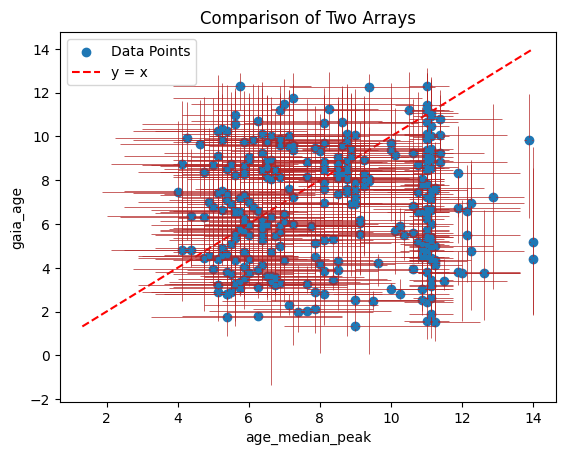

In [75]:
model_age = np.array(age_median_peak)
gaia_age = np.array(gaia_age)
# Create scatter plot
plt.scatter(model_age, gaia_age, label='Data Points')

plt.plot([min(model_age.min(), gaia_age.min()), max(model_age.max(), gaia_age.max())],
         [min(model_age.min(), gaia_age.min()), max(model_age.max(), gaia_age.max())],
         color='red', linestyle='--', label='y = x')
# age_median_peak = np.array(age_median_peak)
# age_peak = np.array(age_peak)
# age_16_percent = np.array(age_16_percent)
# age_84_percent = np.array(age_84_percent)
index_gaiadr3 = [319219, 319214, 319218, 319229, 319224, 319215, 319223, 319228, 319226, 319208, 319206, 319207, 319211, 319213, 319255, 319216, 319240, 319202, 319236, 319237, 319201, 319203, 319212, 319258, 319222, 319217, 319205, 319315, 319242, 319204, 319210, 319209, 319193, 319234, 319189, 319348, 319196, 319220, 319346, 319199, 319191, 319352, 319343, 319198, 319314, 319188, 319354, 319200, 319155, 319379, 319360, 319186, 319185, 319183, 319356, 319177, 319182, 319184, 319163, 319165, 319181, 319364, 319359, 319179, 319370, 319366, 319387, 319421, 319368, 319393, 319384, 319180, 319400, 319391, 319178, 319134, 319169, 319172, 319158, 319371, 319174, 319162, 319401, 319170, 319375, 319108, 319110, 319156, 319171, 319167, 319123, 319396, 319423, 319378, 319168, 319383, 319136, 319390, 319166, 319121, 319389, 319399, 319133, 319152, 319146, 319135, 319111, 319151, 319381, 319385, 319150, 319419, 319120, 319145, 319407, 319113, 319424, 319122, 319382, 319420, 319154, 319395, 319410, 319098, 319405, 319159, 319394, 319112, 319127, 319157, 319426, 319442, 319130, 319416, 319404, 319138, 319398, 319118, 319128, 319106, 319099, 68724, 319144, 319139, 319392, 319415, 319409, 319403, 319412, 319124, 319107, 319397, 319119, 319434, 319425, 319142, 319132, 68713, 319402, 319109, 319126, 319406, 319422, 319418, 68728, 319141, 319436, 319140, 319137, 319439, 319408, 68708, 319428, 319440, 319129, 319433, 68707, 319429, 319103, 68720, 319413, 68726, 68705, 319432, 319414, 68730, 319100, 68702, 319097, 319435, 319417, 68710, 68697, 68701, 68704, 319117, 68699, 68718, 319431, 68733, 319437, 319114, 68692, 68706, 68725, 68698, 68715, 319105, 319115, 319102, 68729, 68721, 68684, 68687, 68732, 68689, 68723, 68693, 68696, 68711, 68688, 68703, 68674, 68690, 68714, 68691, 68712, 68694, 68678, 68695, 68673, 68679, 68669, 68677, 68722, 68675, 68731, 68685, 68671, 68670, 68664, 68663, 68676, 68661, 68662, 68659, 68654, 68658, 68660, 68657, 68644, 68656, 68653, 68655, 68604, 68651, 68652, 68650, 68600, 68632, 68631, 68645, 68638, 68648, 68642, 68628, 68616, 68649, 68624, 68646, 68602, 68647, 68606, 68583, 68640, 68641, 68615, 68623, 68643, 68637, 68610, 68634, 68601, 68619, 68621, 68584, 68633, 68629, 68598, 68605, 68609, 68591, 68627, 68630, 68607, 68620, 68599, 68586, 68593, 68596, 68618, 68625, 68622, 68589, 68613, 68594, 68611, 68614, 68597, 68612, 68582, 68587, 68590]

error = []
error_minus_data = []
error_plus_data = []
for i in index_gaiadr3:
    error_minus_data.append(data_gaiadr3['e50_age_bstep'][i]-data_gaiadr3['e16_age_bstep'][i])
    error_plus_data.append(data_gaiadr3['e84_age_bstep'][i]-data_gaiadr3['e50_age_bstep'][i])
error_minus = age_median_peak - age_16_percent
error_plus = age_84_percent - age_median_peak

plt.errorbar(model_age, gaia_age,  xerr=[error_minus,error_plus], yerr=[error_minus_data,error_plus_data], fmt='.', ecolor = 'firebrick', elinewidth = 0.5)

# Add labels and title
plt.xlabel('age_median_peak')
plt.ylabel('gaia_age')
plt.title('Comparison of Two Arrays')
plt.legend()
# Show plot
plt.show()

(array([0.22972277, 0.18705997, 0.17721471, 0.13127015, 0.0853256 ,
        0.08860735, 0.04594455, 0.03281754, 0.02953578, 0.01969052]),
 array([1.44882993e-03, 9.74979546e-01, 1.94851026e+00, 2.92204098e+00,
        3.89557169e+00, 4.86910241e+00, 5.84263312e+00, 6.81616384e+00,
        7.78969456e+00, 8.76322527e+00, 9.73675599e+00]),
 <BarContainer object of 10 artists>)

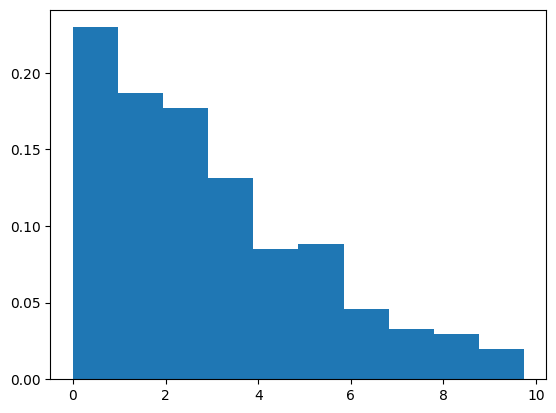

In [36]:
diff = []
for i in range(len(model_age)):
    diff.append(np.abs(model_age[i]-gaia_age[i]))
plt.hist(diff,density='true')

[1.3129313872704977, 0.09191770644539832, 0.5917587386114076, 0.8505155852976269, 1.3556409525275308, 3.04127867784453, 3.134122486401282, 1.137207245858399, 1.7621649997354, 1.816320762674839, 3.0094641472325154, 2.9156530826483267, 2.38914237271212, 1.7656683939001643, 0.9799502343069405, 3.1398403365698595, 1.806789526524444, 1.616336688573753, 0.4215892507846841, 3.7258812250126896, 3.263617803798941, 3.49185512794843, 1.9478802323384863, 3.558188946283564, 2.3229858853494205, 3.4202524664039915, 2.1372322677329567, 0.34813493958852404, 3.618171711473875, 2.080856017853521, 4.230792247283387, 1.652882687376997, 2.6724472585958856, 1.5074469270715345, 1.164250869633487, 1.939809109190433, 0.8505155852976269, 3.3872848718382094, 0.9323140954376228, 0.5651252080872915, 2.826369944516885, 2.998524242715281, 0.6754018568197939, 0.4215892507846841, 1.816320762674839, 2.6724472585958856, 4.159629277400207, 4.871867693109708, 2.699162342367444, 1.3056886177248244, 5.149267941218723, 0.6134

In [71]:
data_gaiadr3.keys()

Index(['sobject_id', 'age_bstep', 'e_age_bstep', 'e16_age_bstep',
       'e50_age_bstep', 'e84_age_bstep', 'm_act_bstep', 'e_m_act_bstep',
       'e16_m_act_bstep', 'e50_m_act_bstep', 'e84_m_act_bstep', 'm_ini_bstep',
       'e_m_ini_bstep', 'e16_m_ini_bstep', 'e50_m_ini_bstep',
       'e84_m_ini_bstep', 'radius_bstep', 'e_radius_bstep', 'e16_radius_bstep',
       'e50_radius_bstep', 'e84_radius_bstep', 'is_redclump_bstep',
       'e_is_redclump_bstep', 'e16_is_redclump_bstep', 'e50_is_redclump_bstep',
       'e84_is_redclump_bstep', 'distance_bstep', 'e_distance_bstep',
       'e16_distance_bstep', 'e50_distance_bstep', 'e84_distance_bstep',
       'ebv_bstep', 'e_ebv_bstep', 'e16_ebv_bstep', 'e50_ebv_bstep',
       'e84_ebv_bstep', 'teff_bstep', 'e_teff_bstep', 'e16_teff_bstep',
       'e50_teff_bstep', 'e84_teff_bstep', 'logg_bstep', 'e_logg_bstep',
       'e16_logg_bstep', 'e50_logg_bstep', 'e84_logg_bstep', 'meh_act_bstep',
       'e_meh_act_bstep', 'e16_meh_act_bstep', 'e50_meh_a

In [67]:
feh_distance = [(0.14508343, 2051.137427345423), (0.310143, 805.3916644059648), (-0.5947027, 962.0083161272364), (-0.62007666, 1146.330762066979), (-0.5192318, 1615.0430672446823), (-0.27111483, 610.2632896732125), (-0.2986536, 658.0098561738307), (0.062052727, 567.358669227199), (-0.3602209, 2010.178804860435), (-0.69014406, 927.6331218939468), (-0.20314217, 1288.617695126641), (0.04819107, 657.6812684324357), (-0.4215126, 1655.4958788405258), (0.35176277, 1375.7350149113433), (0.21948767, 1314.450206307759), (-0.48844528, 679.5008331799488), (0.2881117, 1193.1050084743606), (0.036828518, 7758.920831445074), (-0.061340332, 816.9940907280412), (-0.34107637, 3933.0767355139014), (-0.13556528, 604.5118717482061), (-0.5645757, 220.33763928481233), (-0.36095142, 1311.3550768436387), (-0.47959423, 361.75688105959745), (-0.13028717, 1093.4873744215256), (-0.99460125, 307.28206565291276), (0.36036062, 2567.518535866972), (0.07924843, 600.2947689522841), (-0.7755313, 337.6198636588217), (0.16980171, 2691.9111061736403), (-0.07881832, 2974.85022362245), (-0.08228874, 2714.5753709469864), (-0.34745264, 456.87109498483414), (0.16891003, 2069.018303876487), (0.008259773, 989.8642596878358), (-0.5689497, 1370.193176056331), (-0.31963682, 1312.2905735668178), (0.052045822, 404.36654430369924), (-0.2188201, 1854.511213920215), (-0.088526726, 761.8817059585675), (-0.21051407, 600.2405240652165), (-0.2510624, 410.83461072141006), (-0.22852468, 986.9478985033768), (-0.096654415, 776.1582981669674), (0.24045467, 3459.146704372558), (-0.5506029, 297.6055354153869), (-0.38030386, 255.80870970256063), (-0.19770718, 322.22233600499413), (-0.26218843, 299.04944953702835), (-0.05172777, 1079.806659334372), (-0.41304588, 403.92438281892515), (0.09981108, 629.287323881925), (-0.511919, 254.00877889872885), (-0.37649107, 959.3816667954261), (-0.13745451, 431.85423701034375), (-0.5905323, 884.5379529424715), (-0.08225727, 1156.920968272799), (0.1015625, 1734.954063721352), (0.25856066, 1319.6706725809693), (-0.24193859, 539.4244738532618), (-0.42657375, 1858.1919080135178), (-0.2559042, 365.22950340068513), (-0.37336826, 3264.9368732143025), (0.17718744, 518.2303491933471), (-0.19602346, 525.1059431468602), (-0.2439971, 819.4029101068169), (-0.027109146, 1041.3965379147978), (-0.63471746, 202.58365773775998), (0.12016201, 516.464075717159), (-0.04433775, 417.0640177632425), (0.29965305, 3008.6886137421156), (0.12037611, 802.6980867214655), (-0.07062721, 1174.089816613431), (-0.16916656, 2040.316322028355), (0.09626436, 2481.4597998856657), (-0.3110137, 1601.4057702670602), (-0.17196989, 3011.2243976733234), (-0.22285366, 1046.6132039939066), (-0.11310005, 2402.824191945949), (-0.32087994, 383.0011873319008), (-0.16995716, 375.16662501628684), (0.27175713, 3086.8165260566784), (0.14276361, 2233.8696207949474), (-0.13032675, 896.1568701340005), (0.13836956, 1695.6847176699464), (0.10501909, 1039.4586546897472), (-0.820662, 551.5496304513878), (-0.09342575, 864.4860392960398), (-0.25999498, 2887.7916942164998), (-0.11378622, 1215.1153352876029), (0.1133194, 1095.4281116097327), (-0.23149014, 1733.210882256249), (0.25443792, 1818.787303680127), (-0.2966957, 747.7561976598214), (-0.05971098, 874.2130253316897), (0.0007305145, 1056.1656864567244), (-0.20926523, 448.5186066821073), (-0.6885724, 326.28457963886814), (-0.25553656, 1033.6684703699423), (-0.24667168, 2678.0784733727546), (-0.6171913, 940.6809875307902), (-0.4611621, 574.5094691992231), (-0.27888823, 521.4344233575744), (0.050453663, 924.048515657125), (-0.36449242, 365.4572690431667), (-0.19246197, 2039.7903436642482), (-0.37106848, 1101.2374287839627), (0.024992943, 6250.6097249156455), (-0.5090852, 518.0262771760515), (-0.0073518753, 579.0218853617039), (0.4731531, 1421.964993395292), (-0.30135822, 1469.686714114649), (-0.18690681, 708.4953554217358), (-0.41428518, 531.3762530538165), (-0.20257902, 1320.8436406737014), (-0.062015057, 963.059922982265), (0.3694477, 1888.1230894128805), (0.26058912, 1184.5554103490144), (-0.21730518, 1596.1547856232964), (-0.6725564, 442.23304145222903), (-0.7847614, 310.0622474382151), (-0.39169407, 911.9661101695546), (-0.0016121864, 483.2323357686232), (-0.22127724, 820.7996386029191), (0.4837494, 1042.1493457066147), (-0.23662233, 2407.94873650107), (0.12700987, 1625.4394956737053), (0.31206512, 919.7080481574181), (0.19915342, 682.5930163995105), (-0.52991533, 993.5315847445024), (-0.15705442, 2034.5766038167044), (-0.4799862, 416.28413926766655), (-0.10743904, 1262.735243497323), (-0.2650075, 361.145633923892), (-0.09446621, 1149.816416593877), (0.06698561, 1275.7885165456817), (-0.14117241, 543.764060823169), (-0.32338715, 1480.6543603060084), (-0.43193102, 643.6115005980926), (0.3398857, 2536.2362535710204), (-0.45823526, 325.8464190473829), (-0.43399858, 811.5511300967229), (0.043081284, 1048.1447903488872), (-0.27069044, 2076.3558094631567), (-0.7421546, 255.28841218832483), (-0.41005898, 842.1677979748837), (-0.08109045, 2135.3913302778087), (-0.57097054, 571.1004375358964), (-0.46384335, 387.0383625524543), (0.08056879, 1163.0210243478853), (-0.24303389, 1057.865248459325), (-0.60582685, 213.03380419075674), (-0.5263343, 1509.4639411523137), (-0.034332752, 500.74207919700774), (0.45009518, 1348.7447039445588), (-0.1197052, 1157.4109452976686), (0.16593075, 1507.3477308864617), (-0.33986998, 2205.9992851407974), (-0.45090294, 361.5176271525298), (-0.28970766, 895.7440929152906), (-0.39003134, 400.8296687522024), (-0.4444399, 274.464455372779), (0.4018736, 1605.1785531888293), (-0.3940816, 834.666268583703), (-0.3421507, 2179.089256759848), (-0.0683465, 1546.8223477262934), (0.10621786, 1350.7120960857285), (-0.34113693, 1545.1969994776491), (0.3550229, 1201.1757114066122), (0.10336685, 2235.1908154681523), (0.052530766, 399.4306030228517), (0.23678732, 1240.14984781516), (0.033058643, 1051.6875246595578), (-0.5431924, 284.53083570688534), (-0.08454037, 346.9493466944813), (-0.3013897, 504.6935383500395), (-0.441473, 371.45068042872975), (-0.23029375, 1434.3980410636152), (-0.5120392, 490.34786799771473), (-0.06438637, 966.9092411258035), (0.4850788, 983.3395413404348), (-0.4038911, 741.2740794882161), (0.36940765, 1614.2437378515606), (0.077171326, 1094.0550015860792), (0.14564037, 569.062380953523), (0.0858202, 1331.8041484758053), (-0.7254858, 851.6220888207033), (0.12401056, 1185.2116565232905), (-0.57287073, 444.81559115645746), (-0.018292427, 855.0719341574089), (-0.18742609, 999.1010758769237), (-0.20242548, 1352.1543015820173), (0.24043608, 2154.3611489613127), (0.0006098747, 1284.828149552945), (-0.50302076, 663.2330270225701), (0.15298223, 944.1668772498572), (0.06553745, 2881.0664767886483), (0.33213425, 1747.7836259121248), (-0.3701887, 1466.8805879057893), (-0.063091755, 1388.9156601557615), (-0.44990778, 364.1375743918932), (-0.049243927, 1260.0929950595064), (0.072517395, 1081.7437699421257), (-0.5567589, 439.8217615693046), (0.015388489, 1018.2922897371639), (0.021083832, 1114.6931315444176), (0.19203043, 2345.3568820424944), (-0.31974697, 4290.233246612121), (-0.0062360764, 1899.4461433385534), (-0.34620523, 1498.318330231112), (-0.22829103, 829.6370151200767), (-0.18839836, 848.6630892601409), (-0.3137784, 1039.293372041524), (-0.5919342, 334.2909562041652), (0.0013537407, 1382.6282673518942), (-0.18149328, 727.873304885919), (-0.18710566, 1210.2073145989762), (-0.17838526, 786.2843921535211), (0.02231121, 756.8443379746324), (-0.007694721, 1045.3587637735338), (-0.24962854, 513.716582031184), (-0.36223412, 382.54257516772327), (-0.18773174, 2469.5890346312594), (-0.030153275, 565.8650511879066), (-0.1482048, 3557.628662493296), (-0.35215282, 251.82216842776242), (-0.22338295, 389.0830005776846), (0.010688305, 2783.867591823539), (0.14676714, 1940.0655840329594), (-0.40679884, 898.0183999541006), (-0.13658667, 1440.1661293683296), (0.20138788, 1157.681500532553), (-0.24432945, 740.6821931351897), (-0.22120619, 1221.2927096655005), (-0.26317215, 1484.8556435391854), (-0.12047672, 606.4862792566757), (-0.15114307, 1788.0263091474922), (0.016716957, 2018.8878399001385), (-0.51440144, 250.89741007493814), (0.36548758, 2452.2313813844603), (-0.48507214, 392.6796141337663), (-0.17071915, 845.8636200779235), (-0.32495642, 489.50625657272303), (-0.3307233, 436.34841978874897), (0.017314434, 1714.5954612083754), (-0.121462345, 1054.2381003421503), (-0.9980955, 252.87857980367414), (-0.120073795, 1364.4154440576579), (-0.76420593, 314.4193048189177), (-0.105353355, 1108.7564437516392), (0.08756447, 938.6123628729024), (-0.099895, 1371.3631652161832), (-0.38939714, 325.96496446425505), (-1.0308943, 384.98750738647925), (-0.21471643, 438.045963058793), (0.33949423, 2915.413342474713), (-0.09284258, 999.9520752343326), (-0.46301794, 3268.906856487951), (-0.0072307587, 1435.6716045403446), (-0.2630849, 511.5506115388834), (-0.14391327, 1221.6886850861977), (-0.06346321, 1402.290798889395), (-0.18632603, 638.8412255187684), (-0.7832198, 151.91564608736064), (-0.16809559, 2163.97880984459), (-0.48292732, 1513.604253909371), (-0.7404938, 2055.3834477616874), (0.20315886, 1206.907827614551), (-0.29148865, 1290.8164787963249), (0.042416573, 1082.5843074234458), (-0.11402893, 1333.820743813198), (0.06440306, 1643.1038111713265), (-0.05849266, 2093.872577597037), (-0.20535803, 434.179985562656), (0.08668041, 1183.5229844007226), (0.22805977, 1429.009063556336), (-0.7405348, 331.75437642019574), (-0.060760975, 2633.734593993901), (-0.16079664, 697.2876972152203), (0.2175026, 1191.7917563020949), (-0.25911283, 1274.9470534111404), (-0.18231058, 2056.330936361808), (-0.36458445, 1383.5723194955315), (-0.42441463, 305.3236007872816), (-0.16518879, 1542.9979481774099), (-0.08790064, 4374.634701867228), (0.07478714, 6099.067270681051), (-0.22841406, 901.5392822521844), (0.3801093, 2077.4238053837034), (-0.57112217, 435.9468757518633), (-0.008066177, 1203.5390423086264), (-0.109223366, 2590.521841164829), (-0.10918522, 2245.7241346733567), (-0.16188192, 1515.6510828893042), (-0.21352959, 460.50012814686824), (-0.11965418, 3119.049542963135), (-0.23104191, 1198.2115577510838), (-0.43678188, 364.2952774179961), (0.008102894, 2315.9460959619373), (-0.034938812, 980.0200969870306), (0.24136925, 1496.2718712463275), (0.02283144, 691.7169480331675), (-0.4411149, 324.4023321179556), (-0.19984579, 2634.9559046960007), (-0.3395772, 291.56986105271295), (0.19911098, 2300.132416588481), (-0.33162832, 1442.4490058094061), (0.14767885, 2138.2516988812445), (-0.34928703, 403.76195453045244), (0.04470396, 579.1890901210172), (-0.20367146, 2095.7414506872874), (-0.41026068, 341.31942352827986), (-0.5576205, 383.33231791465056)]
feh_data = []
for i in range(len(feh_distance)):
    feh_data.append(feh_distance[i][0])


313


In [62]:
feh_peak = [-0.3, 0.0, -0.1, -0.2, -1.0, -0.2, -0.3, 0.0, -0.8, -0.8, -0.2, -0.2, -0.6, -0.3, 0.0, -0.6, -0.1, -0.1, -0.1, -0.8, -0.2, -0.1, -0.3, -0.3, -0.7, -0.1, -0.8, 0.0, -0.3, -0.8, -0.9, -0.7, -0.3, -0.3, -0.1, -1.0, -0.8, -0.3, -0.1, 0.0, -0.1, -0.3, 0.0, -0.1, -0.7, -0.3, -0.3, -0.3, -0.2, 0.1, -0.5, 0.0, -0.3, 0.0, -0.1, -0.2, -0.3, -0.5, 0.0, -0.4, -0.7, -0.3, -0.9, -0.3, -0.3, -0.1, -0.8, -0.4, -0.4, -0.1, -0.8, -0.5, -0.3, -0.6, -0.9, -0.3, -0.9, -0.3, -1.0, -0.2, -0.3, -0.5, -0.6, 0.0, -0.2, -0.3, -0.4, -0.1, -0.7, 0.0, -0.1, -0.2, 0.0, 0.0, -0.1, 0.0, -0.4, -0.3, -0.2, -0.8, -0.4, -0.3, -0.1, -0.1, -0.3, -0.8, -0.7, 0.0, -0.3, -0.5, 0.0, -0.1, -0.4, -0.4, 0.0, 0.0, -0.2, -0.1, 0.0, -0.2, -0.4, 0.1, -0.3, 0.0, -0.1, -0.8, -0.2, -0.1, -0.1, -0.7, -0.8, -0.1, -0.7, -0.1, -0.3, 0.0, -0.1, -0.4, -0.3, -0.8, -0.3, -0.2, 0.0, -0.5, -0.3, -0.1, -0.3, -0.3, -0.3, -0.3, 0.0, -0.4, -0.4, -0.2, -0.2, -0.4, -0.4, -0.6, -0.3, 0.0, -0.5, -0.1, -0.2, 0.0, -0.6, -0.2, -0.2, -0.7, 0.0, -0.5, -0.1, -0.2, -0.1, -0.2, -0.3, -0.2, -0.2, 0.0, -0.3, 0.0, 0.0, -0.5, -0.3, -0.3, -0.3, 0.0, 0.0, -0.1, -0.2, -0.6, -0.1, 0.0, -0.6, 0.0, 0.0, -0.3, -0.7, -0.3, -0.1, -0.1, -0.3, -0.8, -0.4, -0.2, -0.1, -0.1, -0.8, -0.7, -0.8, -0.4, 0.0, -0.1, 0.0, 0.0, 0.0, -0.4, 0.0, -0.4, 0.0, 0.0, -0.3, -0.5, -0.5, -0.2, -0.8, -0.3, -0.1, -0.6, -0.2, -0.4, -0.5, -0.2, -0.3, -0.4, -0.2, -0.3, -0.1, -0.6, -0.3, -0.8, 0.0, -0.1, -0.2, -0.3, -0.5, -0.1, -0.3, 0.0, -0.3, 0.0, -0.1, 0.0, -0.3, 0.1, -0.1, -0.7, -0.3, -0.7, 0.0, -0.3, -0.1, -0.1, -0.3, -0.2, -0.8, -0.9, -0.6, 0.0, -0.3, -0.1, -0.1, -0.2, -0.4, -0.1, -0.1, -0.1, 0.1, -0.9, 0.1, -0.1, -0.4, -0.3, -1.0, -0.1, -0.2, -0.8, -0.9, -0.3, -0.3, -0.1, 0.0, -0.9, -0.3, -0.2, -0.1, -0.5, -0.5, -0.2, -0.7, 0.0, -0.1, -0.3, -0.3, -0.9, -0.1, -0.8, -0.7, -0.3, -0.2, 0.1, -0.8, -0.3, -0.2]
feh_median_peak = [-0.4, 0.0, -0.1, -0.1, -0.8, -0.2, -0.3, 0.0, -0.6, -0.8, -0.3, -0.2, -0.6, -0.3, -0.1, -0.6, -0.1, -0.1, -0.1, -0.8, -0.3, -0.2, -0.4, -0.3, -0.8, -0.2, -0.8, 0.0, -0.3, -0.8, -0.8, -0.8, -0.4, -0.4, -0.1, -0.9, -0.7, -0.3, -0.3, -0.1, -0.1, -0.3, 0.0, -0.1, -0.7, -0.3, -0.2, -0.3, -0.1, 0.0, -0.5, 0.0, -0.2, 0.0, -0.2, -0.2, -0.3, -0.6, -0.1, -0.4, -0.8, -0.4, -0.8, -0.3, -0.2, -0.1, -0.7, -0.3, -0.4, -0.2, -0.8, -0.6, -0.3, -0.8, -0.8, -0.4, -0.8, -0.3, -0.8, -0.1, -0.4, -0.7, -0.5, 0.0, -0.2, -0.3, -0.4, -0.1, -0.7, -0.1, -0.2, -0.1, -0.1, 0.0, -0.1, 0.0, -0.4, -0.2, -0.1, -0.8, -0.4, -0.3, -0.1, 0.0, -0.4, -0.6, -0.8, -0.1, -0.3, -0.4, -0.1, -0.1, -0.5, -0.4, -0.1, 0.0, -0.3, -0.1, -0.1, -0.3, -0.4, 0.0, -0.4, 0.0, -0.1, -0.8, -0.2, 0.0, -0.1, -0.7, -0.6, -0.2, -0.7, -0.1, -0.2, 0.0, -0.1, -0.6, -0.3, -0.7, -0.4, -0.2, 0.0, -0.4, -0.2, 0.0, -0.5, -0.3, -0.3, -0.2, 0.0, -0.3, -0.3, -0.2, -0.3, -0.4, -0.3, -0.5, -0.3, 0.0, -0.5, -0.1, -0.1, 0.0, -0.6, -0.3, -0.3, -0.7, -0.1, -0.5, -0.1, -0.1, -0.1, -0.3, -0.3, -0.2, -0.2, -0.1, -0.3, 0.0, 0.0, -0.6, -0.2, -0.3, -0.3, -0.1, 0.0, -0.1, -0.3, -0.7, 0.0, 0.0, -0.5, 0.0, 0.0, -0.2, -0.7, -0.2, -0.1, -0.1, -0.4, -0.8, -0.3, -0.3, -0.1, -0.1, -0.7, -0.8, -0.6, -0.5, 0.0, 0.0, 0.0, 0.0, -0.1, -0.4, -0.1, -0.3, 0.0, 0.0, -0.3, -0.5, -0.6, -0.2, -0.8, -0.2, -0.1, -0.7, -0.3, -0.4, -0.6, -0.2, -0.3, -0.4, -0.1, -0.3, -0.1, -0.6, -0.3, -0.7, 0.1, -0.1, -0.2, -0.3, -0.6, -0.2, -0.2, -0.1, -0.4, 0.0, -0.1, -0.1, -0.3, 0.1, -0.1, -0.7, -0.3, -0.8, -0.2, -0.3, -0.1, -0.1, -0.3, -0.2, -0.8, -0.8, -0.9, -0.1, -0.4, -0.1, -0.1, -0.2, -0.4, -0.1, -0.1, -0.1, 0.0, -0.8, 0.1, -0.1, -0.4, -0.4, -0.9, -0.2, -0.2, -0.8, -0.9, -0.3, -0.4, -0.2, -0.1, -0.8, -0.5, -0.2, -0.1, -0.7, -0.7, -0.2, -0.6, 0.0, -0.1, -0.3, -0.4, -0.8, -0.1, -0.6, -0.8, -0.5, -0.1, -0.1, -0.6, -0.3, -0.2]
feh_16_percent = [-0.9, -0.2, -0.3, -0.3, -1.2, -0.3, -0.5, -0.2, -1.0, -1.1, -0.6, -0.4, -0.9, -0.5, -0.3, -0.9, -0.3, -0.2, -0.3, -1.1, -0.5, -0.4, -0.6, -0.5, -1.2, -0.4, -1.1, -0.1, -0.6, -1.1, -1.2, -1.1, -0.7, -0.9, -0.2, -1.4, -1.0, -0.5, -1.0, -0.3, -0.3, -0.6, -0.2, -0.4, -0.9, -0.5, -0.5, -0.5, -0.3, -0.2, -0.8, -0.1, -0.5, -0.2, -0.5, -0.3, -0.5, -1.0, -0.3, -0.6, -1.1, -0.7, -1.1, -0.6, -0.4, -0.3, -1.0, -0.5, -0.7, -0.4, -1.1, -1.0, -0.5, -1.1, -1.1, -0.9, -1.1, -0.5, -1.1, -0.3, -0.7, -0.9, -0.9, -0.2, -0.5, -0.5, -0.7, -0.3, -1.0, -0.3, -0.4, -0.2, -0.3, -0.1, -0.3, -0.2, -0.8, -0.4, -0.3, -1.1, -0.6, -0.6, -0.3, -0.2, -0.7, -1.0, -1.1, -0.3, -0.5, -0.7, -0.4, -0.4, -0.9, -0.6, -0.3, -0.2, -0.8, -0.2, -0.4, -0.5, -0.6, -0.2, -0.7, -0.2, -0.3, -1.1, -0.4, -0.2, -0.3, -1.0, -1.0, -0.4, -1.0, -0.3, -0.4, -0.2, -0.4, -1.1, -0.8, -1.0, -0.6, -0.4, -0.2, -0.9, -0.5, -0.2, -1.0, -0.6, -0.5, -0.5, -0.2, -0.5, -0.6, -0.3, -0.5, -0.6, -0.6, -0.9, -0.5, -0.2, -0.8, -0.3, -0.3, -0.2, -0.9, -0.6, -0.5, -0.9, -0.3, -1.0, -0.3, -0.3, -0.2, -0.5, -0.6, -0.5, -0.4, -0.4, -0.6, -0.2, -0.2, -1.0, -0.4, -0.5, -0.6, -0.3, -0.1, -0.2, -0.5, -1.0, -0.2, -0.2, -0.9, -0.2, -0.2, -0.4, -1.0, -0.5, -0.3, -0.3, -0.7, -1.1, -0.5, -0.5, -0.3, -0.3, -1.0, -1.2, -0.9, -1.0, -0.2, -0.2, -0.2, -0.1, -0.3, -0.6, -0.3, -0.5, -0.1, -0.2, -0.5, -0.7, -1.1, -0.4, -1.1, -0.5, -0.3, -1.1, -0.8, -0.5, -0.9, -0.3, -0.4, -0.5, -0.4, -0.5, -0.3, -1.0, -0.5, -1.0, -0.1, -0.2, -0.4, -0.6, -1.0, -0.4, -0.5, -0.3, -0.6, -0.2, -0.2, -0.3, -0.6, 0.0, -0.2, -1.0, -0.5, -1.1, -0.6, -0.5, -0.3, -0.3, -0.5, -0.4, -1.0, -1.0, -1.7, -0.3, -0.7, -0.3, -0.3, -0.4, -0.9, -0.2, -0.3, -0.4, -0.1, -1.1, -0.2, -0.2, -0.6, -0.9, -1.4, -0.4, -0.3, -1.1, -1.1, -0.5, -0.9, -0.5, -0.3, -1.1, -1.0, -0.3, -0.4, -0.9, -1.0, -0.4, -1.0, -0.2, -0.3, -0.6, -0.6, -1.1, -0.3, -1.0, -1.1, -1.0, -0.3, -0.3, -0.9, -0.6, -0.5] 
feh_84_percent = [0.0, 0.2, 0.1, 0.1, -0.5, 0.0, -0.1, 0.2, -0.1, -0.4, -0.1, 0.0, -0.2, 0.0, 0.1, -0.2, 0.1, 0.1, 0.1, -0.5, -0.1, 0.0, -0.1, -0.1, -0.4, 0.0, -0.4, 0.2, -0.1, -0.5, -0.4, -0.5, -0.2, 0.0, 0.1, -0.4, -0.4, -0.1, 0.0, 0.2, 0.0, -0.1, 0.1, 0.1, -0.3, -0.1, 0.0, 0.0, 0.1, 0.2, -0.2, 0.2, 0.0, 0.2, 0.0, 0.0, -0.1, -0.2, 0.1, -0.1, -0.5, -0.1, -0.4, -0.1, 0.0, 0.1, -0.3, -0.1, -0.1, 0.0, -0.5, -0.3, -0.1, -0.5, -0.3, -0.1, -0.5, -0.1, -0.4, 0.1, -0.1, -0.4, -0.1, 0.2, 0.0, 0.0, 0.0, 0.0, -0.4, 0.1, 0.0, 0.1, 0.1, 0.2, 0.0, 0.2, -0.2, 0.0, 0.1, -0.5, -0.2, 0.0, 0.1, 0.1, -0.1, -0.1, -0.5, 0.1, 0.0, -0.1, 0.1, 0.1, -0.2, -0.1, 0.1, 0.2, 0.0, 0.1, 0.1, 0.0, -0.1, 0.2, -0.1, 0.2, 0.0, -0.5, 0.1, 0.1, 0.1, -0.5, -0.2, 0.0, -0.4, 0.1, 0.0, 0.1, 0.1, -0.3, -0.1, -0.3, -0.2, 0.0, 0.2, 0.0, 0.0, 0.2, -0.1, 0.0, -0.2, 0.0, 0.2, -0.1, -0.1, 0.1, 0.0, -0.2, -0.1, -0.1, -0.1, 0.2, -0.2, 0.0, 0.2, 0.2, -0.1, -0.1, -0.1, -0.4, 0.1, -0.1, 0.2, 0.1, 0.1, 0.0, -0.1, 0.0, 0.1, 0.1, -0.1, 0.2, 0.1, -0.3, 0.1, -0.1, 0.0, 0.1, 0.2, 0.1, 0.0, -0.3, 0.1, 0.1, -0.1, 0.1, 0.1, 0.0, -0.4, 0.0, 0.1, 0.1, -0.1, -0.4, -0.2, 0.0, 0.1, 0.0, -0.3, -0.5, -0.1, -0.2, 0.2, 0.2, 0.2, 0.2, 0.1, -0.1, 0.1, 0.0, 0.2, 0.2, -0.2, -0.2, -0.3, 0.1, -0.4, 0.0, 0.1, -0.4, 0.1, -0.2, -0.2, 0.1, -0.1, -0.2, 0.1, -0.1, 0.1, -0.1, -0.1, -0.3, 0.2, 0.0, 0.0, -0.1, -0.2, 0.0, 0.0, 0.1, -0.2, 0.2, 0.2, 0.1, -0.1, 0.2, 0.1, -0.4, -0.1, -0.4, 0.0, -0.1, 0.0, 0.1, -0.1, 0.1, -0.5, -0.4, -0.4, 0.1, -0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.2, -0.4, 0.2, 0.1, -0.2, 0.0, -0.4, 0.0, 0.0, -0.5, -0.6, -0.1, 0.0, 0.0, 0.1, -0.4, -0.1, 0.0, 0.0, -0.4, -0.3, 0.1, -0.2, 0.1, 0.1, -0.1, -0.2, -0.5, 0.1, -0.2, -0.5, -0.1, 0.0, 0.2, -0.1, -0.1, 0.1]



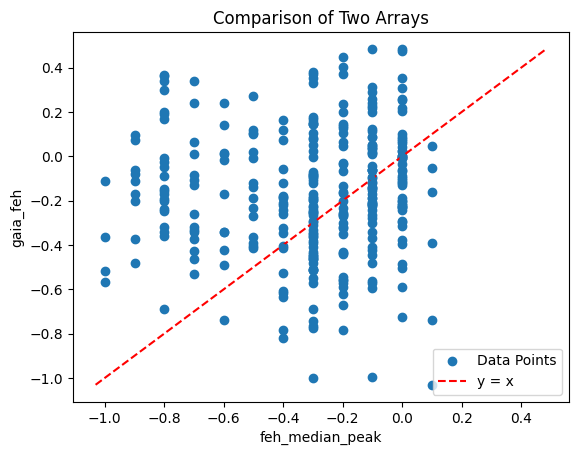

In [66]:
model_feh = np.array(feh_peak)
gaia_feh = np.array(feh_data)
# Create scatter plot
plt.scatter(model_feh, gaia_feh, label='Data Points')

plt.plot([min(model_feh.min(), gaia_feh.min()), max(model_feh.max(), gaia_feh.max())],
         [min(model_feh.min(), gaia_feh.min()), max(model_feh.max(), gaia_feh.max())],
         color='red', linestyle='--', label='y = x')
# age_median_peak = np.array(age_median_peak)
# age_peak = np.array(age_peak)
# age_16_percent = np.array(age_16_percent)
# age_84_percent = np.array(age_84_percent)
# index_gaiadr3 = [319219, 319214, 319218, 319229, 319224, 319215, 319223, 319228, 319226, 319208, 319206, 319207, 319211, 319213, 319255, 319216, 319240, 319202, 319236, 319237, 319201, 319203, 319212, 319258, 319222, 319217, 319205, 319315, 319242, 319204, 319210, 319209, 319193, 319234, 319189, 319348, 319196, 319220, 319346, 319199, 319191, 319352, 319343, 319198, 319314, 319188, 319354, 319200, 319155, 319379, 319360, 319186, 319185, 319183, 319356, 319177, 319182, 319184, 319163, 319165, 319181, 319364, 319359, 319179, 319370, 319366, 319387, 319421, 319368, 319393, 319384, 319180, 319400, 319391, 319178, 319134, 319169, 319172, 319158, 319371, 319174, 319162, 319401, 319170, 319375, 319108, 319110, 319156, 319171, 319167, 319123, 319396, 319423, 319378, 319168, 319383, 319136, 319390, 319166, 319121, 319389, 319399, 319133, 319152, 319146, 319135, 319111, 319151, 319381, 319385, 319150, 319419, 319120, 319145, 319407, 319113, 319424, 319122, 319382, 319420, 319154, 319395, 319410, 319098, 319405, 319159, 319394, 319112, 319127, 319157, 319426, 319442, 319130, 319416, 319404, 319138, 319398, 319118, 319128, 319106, 319099, 68724, 319144, 319139, 319392, 319415, 319409, 319403, 319412, 319124, 319107, 319397, 319119, 319434, 319425, 319142, 319132, 68713, 319402, 319109, 319126, 319406, 319422, 319418, 68728, 319141, 319436, 319140, 319137, 319439, 319408, 68708, 319428, 319440, 319129, 319433, 68707, 319429, 319103, 68720, 319413, 68726, 68705, 319432, 319414, 68730, 319100, 68702, 319097, 319435, 319417, 68710, 68697, 68701, 68704, 319117, 68699, 68718, 319431, 68733, 319437, 319114, 68692, 68706, 68725, 68698, 68715, 319105, 319115, 319102, 68729, 68721, 68684, 68687, 68732, 68689, 68723, 68693, 68696, 68711, 68688, 68703, 68674, 68690, 68714, 68691, 68712, 68694, 68678, 68695, 68673, 68679, 68669, 68677, 68722, 68675, 68731, 68685, 68671, 68670, 68664, 68663, 68676, 68661, 68662, 68659, 68654, 68658, 68660, 68657, 68644, 68656, 68653, 68655, 68604, 68651, 68652, 68650, 68600, 68632, 68631, 68645, 68638, 68648, 68642, 68628, 68616, 68649, 68624, 68646, 68602, 68647, 68606, 68583, 68640, 68641, 68615, 68623, 68643, 68637, 68610, 68634, 68601, 68619, 68621, 68584, 68633, 68629, 68598, 68605, 68609, 68591, 68627, 68630, 68607, 68620, 68599, 68586, 68593, 68596, 68618, 68625, 68622, 68589, 68613, 68594, 68611, 68614, 68597, 68612, 68582, 68587, 68590]

# error = []
# error_minus_data = []
# error_plus_data = []
# for i in index_gaiadr3:
#     error_minus_data.append(data_gaiadr3['e50_age_bstep'][i]-data_gaiadr3['e16_age_bstep'][i])
#     error_plus_data.append(data_gaiadr3['e84_age_bstep'][i]-data_gaiadr3['e50_age_bstep'][i])
# error_minus = age_median_peak - age_16_percent
# error_plus = age_84_percent - age_median_peak

plt.errorbar(model_feh, gaia_feh, fmt='.', ecolor = 'firebrick', elinewidth = 0.5)

# Add labels and title
plt.xlabel('feh_median_peak')
plt.ylabel('gaia_feh')
plt.title('Comparison of Two Arrays')
plt.legend()
# Show plot
plt.show()

            0
0    0.145083
1    0.310143
2   -0.594703
3   -0.620077
4   -0.519232
..        ...
308 -0.349287
309  0.044704
310 -0.203671
311 -0.410261
312 -0.557620

[313 rows x 1 columns]


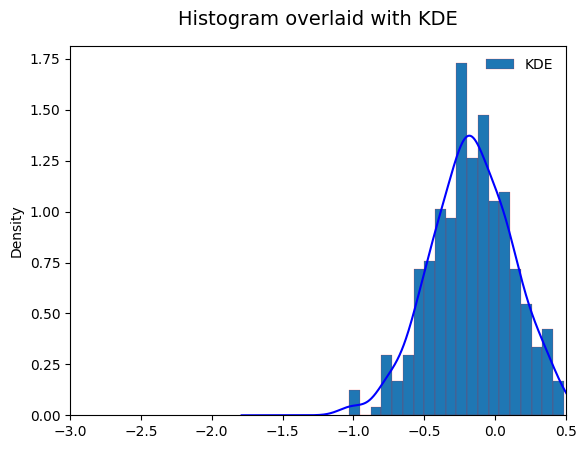

In [70]:
feh = feh_data
feh = pd.DataFrame(feh)
print(feh)
# random number generator

# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
ax = feh.plot.hist(bins=20, density=True, edgecolor='red', linewidth=0.125)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
feh.plot.density(color='blue', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim([-3.0,0.5])
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()